In [1]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Function to compute Hamming distance between two sequences
def hamming_distance(s1, s2):
    return sum(c1 != c2 for c1, c2 in zip(s1, s2))

# Read data from file
path = "/content/drive/MyDrive/rna3.o/rmdb_data.v1.3.0.csv"
df = pd.read_csv(path)

# Select the "sequence" column and the first 20000 rows
subset_sequence = df.loc[:76737, "sequence"]
display(subset_sequence)

0        GGGAAACUGCCUGAUGGAGGGGGAUAACUACUGGAAACGGUAGCUA...
1        CGGAAACUGCCUGAUGGAGGGGGAUAACUACUGGAAACGGUAGCUA...
2        GCGAAACUGCCUGAUGGAGGGGGAUAACUACUGGAAACGGUAGCUA...
3        GGCAAACUGCCUGAUGGAGGGGGAUAACUACUGGAAACGGUAGCUA...
4        GGGUAACUGCCUGAUGGAGGGGGAUAACUACUGGAAACGGUAGCUA...
                               ...                        
76732    GGAAAAAAAAAAAAAAAAGCGAUGCGAAAAAAAAAAAAAAGAUACA...
76733    GGAAAAAAAAAAAAAAAAGCGAUGCGAAAAAAAAAAAAAAGAUACA...
76734    GGAAAAAAAAAAAAAAAGCUACACGAAAAAAAAAAAAAGGUAUCAA...
76735    GGAAAAAAAAAAAAAAAGCUACACGAAAAAAAAAAAAAGGUAUCAA...
76736    GGAAAAAAAAAAAAAAAGCUACACGAAAAAAAAAAAAAAGUAUCAA...
Name: sequence, Length: 76737, dtype: object

In [3]:
# Now let's assume you have a new sequence

row_number_new_sequence= 50000
similarity_threshold = 0.90

In [4]:
m = df.iloc[:,:155]
columns_to_remove = ["sequence_id", "dataset_name", "reads", "SN_filter", "experiment_type"]
df1= m.drop(columns=columns_to_remove)
display(df1)


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0139,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148
0,GGGAAACUGCCUGAUGGAGGGGGAUAACUACUGGAAACGGUAGCUA...,10.357,0.781,0.637,0.949,1.294,1.827,0.971,0.335,0.623,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CGGAAACUGCCUGAUGGAGGGGGAUAACUACUGGAAACGGUAGCUA...,9.657,0.478,0.499,0.236,0.504,0.749,0.617,0.178,0.418,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GCGAAACUGCCUGAUGGAGGGGGAUAACUACUGGAAACGGUAGCUA...,9.987,0.152,0.366,1.085,2.875,2.124,1.148,0.442,0.760,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GGCAAACUGCCUGAUGGAGGGGGAUAACUACUGGAAACGGUAGCUA...,9.718,0.566,0.225,0.150,0.889,1.906,1.068,0.425,0.782,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GGGUAACUGCCUGAUGGAGGGGGAUAACUACUGGAAACGGUAGCUA...,9.672,0.442,0.307,0.425,0.265,1.346,0.648,0.121,0.371,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76732,GGAAAAAAAAAAAAAAAAGCGAUGCGAAAAAAAAAAAAAAGAUACA...,0.234,-0.760,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76733,GGAAAAAAAAAAAAAAAAGCGAUGCGAAAAAAAAAAAAAAGAUACA...,0.186,-2.186,0.000,0.000,0.000,0.000,0.000,1.008,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76734,GGAAAAAAAAAAAAAAAGCUACACGAAAAAAAAAAAAAGGUAUCAA...,0.353,1.038,0.693,0.000,0.000,0.000,0.000,0.986,-0.618,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76735,GGAAAAAAAAAAAAAAAGCUACACGAAAAAAAAAAAAAGGUAUCAA...,0.328,4.951,-0.829,0.000,0.000,0.000,0.000,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
import pandas as pd
import numpy as np

# Calculate the mean of each column except 'sequence'
means = df1.drop('sequence', axis=1).mean()

# Replace NaN values with column means
df1.fillna(means, inplace=True)

display(df1)


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0139,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148
0,GGGAAACUGCCUGAUGGAGGGGGAUAACUACUGGAAACGGUAGCUA...,10.357,0.781,0.637,0.949,1.294,1.827,0.971,0.335,0.623,...,0.366367,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738
1,CGGAAACUGCCUGAUGGAGGGGGAUAACUACUGGAAACGGUAGCUA...,9.657,0.478,0.499,0.236,0.504,0.749,0.617,0.178,0.418,...,0.366367,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738
2,GCGAAACUGCCUGAUGGAGGGGGAUAACUACUGGAAACGGUAGCUA...,9.987,0.152,0.366,1.085,2.875,2.124,1.148,0.442,0.760,...,0.366367,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738
3,GGCAAACUGCCUGAUGGAGGGGGAUAACUACUGGAAACGGUAGCUA...,9.718,0.566,0.225,0.150,0.889,1.906,1.068,0.425,0.782,...,0.366367,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738
4,GGGUAACUGCCUGAUGGAGGGGGAUAACUACUGGAAACGGUAGCUA...,9.672,0.442,0.307,0.425,0.265,1.346,0.648,0.121,0.371,...,0.366367,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76732,GGAAAAAAAAAAAAAAAAGCGAUGCGAAAAAAAAAAAAAAGAUACA...,0.234,-0.760,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.366367,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738
76733,GGAAAAAAAAAAAAAAAAGCGAUGCGAAAAAAAAAAAAAAGAUACA...,0.186,-2.186,0.000,0.000,0.000,0.000,0.000,1.008,0.000,...,0.366367,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738
76734,GGAAAAAAAAAAAAAAAGCUACACGAAAAAAAAAAAAAGGUAUCAA...,0.353,1.038,0.693,0.000,0.000,0.000,0.000,0.986,-0.618,...,0.366367,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738
76735,GGAAAAAAAAAAAAAAAGCUACACGAAAAAAAAAAAAAGGUAUCAA...,0.328,4.951,-0.829,0.000,0.000,0.000,0.000,0.000,0.000,...,0.366367,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738


In [6]:
r=df1.drop(columns="sequence")
averages = r.mean()
averages
columns_with_nan_average = averages[averages.isna()].index.tolist()
columns_with_nan_average
df2= r.drop(columns=columns_with_nan_average)


In [7]:
for column in df2.columns:
    if pd.api.types.is_numeric_dtype(df2[column]):
        df2[column].fillna(df2[column].mean(), inplace=True)
display(df2)

,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,reactivity_0009,...,reactivity_0139,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148
0,10.357,0.781,0.637,0.949,1.294,1.827,0.971,0.335,0.623,0.862,...,0.366367,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738
1,9.657,0.478,0.499,0.236,0.504,0.749,0.617,0.178,0.418,0.616,...,0.366367,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738
2,9.987,0.152,0.366,1.085,2.875,2.124,1.148,0.442,0.760,0.674,...,0.366367,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738
3,9.718,0.566,0.225,0.150,0.889,1.906,1.068,0.425,0.782,0.759,...,0.366367,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738
4,9.672,0.442,0.307,0.425,0.265,1.346,0.648,0.121,0.371,0.929,...,0.366367,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76732,0.234,-0.760,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.366367,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738
76733,0.186,-2.186,0.000,0.000,0.000,0.000,0.000,1.008,0.000,0.000,...,0.366367,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738
76734,0.353,1.038,0.693,0.000,0.000,0.000,0.000,0.986,-0.618,0.326,...,0.366367,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738
76735,0.328,4.951,-0.829,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.366367,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738


In [8]:
given_sequence= df1.iloc[row_number_new_sequence:row_number_new_sequence+1, :]  #fletch row from data
display(given_sequence)

droped_list1 = df1.drop(row_number_new_sequence)                     #removes row from data

,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0139,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148
50000,GGAAAAGCGUGUGACAAUGGGUAAAAUCUCCAUUGUGACACGAAUA...,0.54,0.362,0.318,0.63,0.779,0.155,0.616,0.306,0.0,...,0.366367,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738


In [9]:
given_sequence= df2.iloc[row_number_new_sequence:row_number_new_sequence+1, :]  #fletch row from data
display(given_sequence)

droped_list2 = df2.drop(row_number_new_sequence)                     #removes row from data

,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,reactivity_0009,...,reactivity_0139,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148
50000,0.54,0.362,0.318,0.63,0.779,0.155,0.616,0.306,0.0,0.0,...,0.366367,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738


In [10]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Assuming your data is stored in a DataFrame df with a column named 'subset_sequence'
sequences = subset_sequence

# Convert DNA sequences into k-mer counts
kmer_size = 3  # Example: Using 3-mers
vectorizer = CountVectorizer(analyzer='char', ngram_range=(kmer_size, kmer_size))
X = vectorizer.fit_transform(sequences)

# Normalize the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X.toarray())

# Choose the number of clusters (k)
k = 100

# Apply k-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_normalized)

# Add cluster labels to the DataFrame
df1['cluster'] = clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


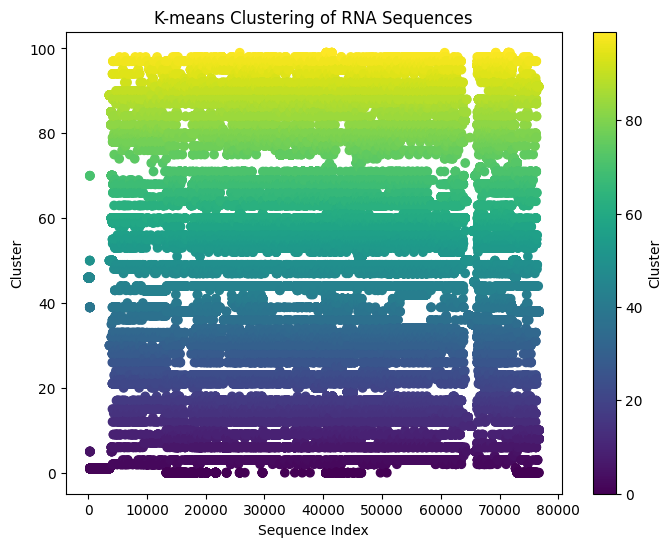

In [11]:
import matplotlib.pyplot as plt

# Assuming df['cluster'] contains the cluster labels assigned by k-means

# Scatter plot of clusters
plt.figure(figsize=(8, 6))
plt.scatter(df1.index, df1['cluster'], c=df1['cluster'], cmap='viridis')
plt.xlabel('Sequence Index')
plt.ylabel('Cluster')
plt.title('K-means Clustering of RNA Sequences')
plt.colorbar(label='Cluster')
plt.show()


In [12]:
for column in df1.columns:
    if column not in ['sequence', 'cluster'] and pd.api.types.is_numeric_dtype(df1[column]):
        df1[column].fillna(df1[column].mean(), inplace=True)
df1

,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
0,GGGAAACUGCCUGAUGGAGGGGGAUAACUACUGGAAACGGUAGCUA...,10.357,0.781,0.637,0.949,1.294,1.827,0.971,0.335,0.623,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,46
1,CGGAAACUGCCUGAUGGAGGGGGAUAACUACUGGAAACGGUAGCUA...,9.657,0.478,0.499,0.236,0.504,0.749,0.617,0.178,0.418,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,46
2,GCGAAACUGCCUGAUGGAGGGGGAUAACUACUGGAAACGGUAGCUA...,9.987,0.152,0.366,1.085,2.875,2.124,1.148,0.442,0.760,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,46
3,GGCAAACUGCCUGAUGGAGGGGGAUAACUACUGGAAACGGUAGCUA...,9.718,0.566,0.225,0.150,0.889,1.906,1.068,0.425,0.782,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,46
4,GGGUAACUGCCUGAUGGAGGGGGAUAACUACUGGAAACGGUAGCUA...,9.672,0.442,0.307,0.425,0.265,1.346,0.648,0.121,0.371,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76732,GGAAAAAAAAAAAAAAAAGCGAUGCGAAAAAAAAAAAAAAGAUACA...,0.234,-0.760,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,10
76733,GGAAAAAAAAAAAAAAAAGCGAUGCGAAAAAAAAAAAAAAGAUACA...,0.186,-2.186,0.000,0.000,0.000,0.000,0.000,1.008,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,10
76734,GGAAAAAAAAAAAAAAAGCUACACGAAAAAAAAAAAAAGGUAUCAA...,0.353,1.038,0.693,0.000,0.000,0.000,0.000,0.986,-0.618,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,38
76735,GGAAAAAAAAAAAAAAAGCUACACGAAAAAAAAAAAAAGGUAUCAA...,0.328,4.951,-0.829,0.000,0.000,0.000,0.000,0.000,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,38


In [13]:
import pandas as pd

# Sample DataFrame df1 (replace this with your actual DataFrame)


# Group data by the 'cluster' column
grouped = df1.groupby('cluster')

# Create separate data frames for each cluster
data_frames = []
for name, group in grouped:
    data_frames.append(group.copy())

# Display the list of data frames
for idx, frame in enumerate(data_frames):
    print(f"DataFrame {idx+1}:")
    display(frame)
    print()


DataFrame 1:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
13295,GGAAAAAAAAAAAAAAAAAAAAACAAAAAGCUCGCAGGAGUACGAA...,0.483,0.576,0.799,0.397,0.999,-0.031,0.342,-0.133,-0.033,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,0
13297,GGAAAAAAAAAAAAAAAAAAAAACAAAAAGUGCAUGCUACGACAAA...,1.077,0.045,0.987,0.795,0.758,0.076,0.285,0.311,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,0
13298,GGAAAAAAAAAAAAAAAAAAAAACAAAAAGUCCAGGCGACCACAAA...,0.518,0.489,1.746,1.446,1.289,-0.048,0.000,0.000,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,0
13299,GGAAAAAAAAAAAAAAAAAAAAACAAAAAGUUGACCCGACAUGGAA...,0.668,0.175,0.655,0.544,0.423,-0.096,0.000,0.000,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,0
13303,GGAAAAAAAAAAAAAAAAAAAAACAAAAACGUGCGGCGACUAGGAA...,0.656,-0.058,1.241,1.286,1.202,-0.028,0.079,-0.107,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76427,GGAAAAAAAAAAAAAAAACGUAACGUAAAUGCAGGAAAACCUGCUA...,0.421,2.364,0.676,0.000,0.000,0.667,0.000,0.000,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,0
76430,GGAAAAAAAAAAAAAAAACGUAACGAAAAAGCAGGAAAACCUGCGA...,0.433,2.690,4.272,0.000,0.000,0.000,0.000,0.000,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,0
76582,GGAAAAAAAAAGACGACGAAAAAAAAAAAACAUGCGAAAGCAUGAA...,0.147,0.408,0.404,0.000,0.302,0.270,0.264,-0.029,0.290,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,0
76650,GGAAAAAAAAAAAAAAAAAAAAGCGAUGGGAAAAAAAAAAAAAAGA...,0.359,-1.495,1.582,0.000,0.546,-1.811,0.000,0.000,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,0



DataFrame 2:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
299,CGCUUCAUAUAAUCCUAAUGAUAUGGUUUGGGAGUUUCUACCAAGA...,7.332,0.415,0.257,0.017,0.218,0.507,0.142,0.344,0.259,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,1
300,CGCUUCAUAUAAUCCUAAUGAUAUGGUUUGGGAGUUUCUACCAAGA...,9.124,0.360,0.144,0.007,-0.014,0.003,-0.100,0.001,0.011,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,1
301,CGCUUCAUAUAAUCCUAAUGAUAUGGUUUGGGAGUUUCUACCAAGA...,14.337,0.507,0.426,0.341,0.365,0.352,0.259,0.360,0.286,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,1
302,GGCUUCAUAUAAUCCUAAUGAUAUGGUUUGGGAGUUUCUACCAAGA...,14.075,0.162,0.054,0.068,0.171,0.274,0.153,0.231,0.137,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,1
303,CCCUUCAUAUAAUCCUAAUGAUAUGGUUUGGGAGUUUCUACCAAGA...,13.715,0.185,0.181,0.510,0.457,0.462,0.316,0.320,0.197,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72769,CGCUUCAUAUAAUCCUAAUGAUAUGGUUUGGGAGUUUCUACCAAGA...,8.763,0.000,0.000,0.000,0.148,0.143,0.234,0.594,0.317,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,1
72770,CGCUUCAUAUAAUCCUAAUGAUAUGGUUUGGGAGUUUCUACCAAGA...,8.517,0.000,0.000,0.000,0.081,0.104,0.151,0.200,0.196,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,1
72771,CGCUUCAUAUAAUCCUAAUGAUAUGGUUUGGCAGUUUCUACCAAGA...,9.548,0.000,0.000,0.000,0.064,0.169,0.184,0.386,0.248,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,1
72772,CGCUUCAUAUAAUCCUAAUGAUAUGGUUUGGGAGUUUCUACCAAGA...,10.019,1.706,0.410,0.373,0.215,0.141,0.184,0.270,0.183,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,1



DataFrame 3:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
4184,GGGAACGACUCGAGUAGAGUCGAAAAAUGGACCAGACGAGGUACAU...,41.799,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,2
4196,GGGAACGACUCGAGUAGAGUCGAAAAUAACGGUCGGCUCAUGACGC...,20.868,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,2
4197,GGGAACGACUCGAGUAGAGUCGAAAACGUCUACUCCGAUUGGCGAG...,22.300,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,2
4251,GGGAACGACUCGAGUAGAGUCGAAAAUAACGGUCGGCGCAUGCAGC...,22.428,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,2
4252,GGGAACGACUCGAGUAGAGUCGAAAAUAACGGUCAGUGCUUGCAGC...,42.578,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68422,GGAAAUCGGGACCUCGUCCCAUGCUACCGACCGACGAGGCUCUUUC...,1.767,0.912000,2.153000,0.966000,0.300000,0.494000,0.402000,0.000000,0.080000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,2
68643,GGAAAAAGAUAUAGAGCCGGGCUCGACGAACGAGUCUCAGUCCAGU...,7.557,0.647000,1.112000,1.086000,1.053000,0.944000,1.035000,0.909000,0.781000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,2
69625,GGAAACUCGAUCCUGCGAAACGCAGAAGUCGACGAAGACAGUAAAA...,5.926,0.823000,1.941000,1.562000,1.173000,0.480000,0.021000,-0.007000,-0.007000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,2
71122,GGAAAAUAAACGUACGAGUAAGUCACGAUUUCGAUUCUAACUAGAC...,10.106,0.780000,2.150000,1.805000,1.292000,1.167000,2.037000,1.140000,0.803000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,2



DataFrame 4:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
5863,GGGAACGACUCGAGUAGAGUCGAAAAAGAGAUGAUGAAAGAAUAGA...,2.445,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,3
6198,GGGAACGACUCGAGUAGAGUCGAAAAGCGAUAGAUAUAAAUGUGUG...,12.832,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,3
6724,GGGAACGACUCGAGUAGAGUCGAAAACCGGCCAUACAUAUAUAGGC...,13.146,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,3
6736,GGGAACGACUCGAGUAGAGUCGAAAACCGGCCAUAUAUAUAUAGGC...,1.286,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,3
8503,GGGAACGACUCGAGUAGAGUCGAAAAAGAGAUGAUGAAAGAAUAGA...,2.220,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76237,GGAAAAGAUAUAUCGAGGCGAUAUAUACAGUACGAAAGUACAAGUA...,0.219,-0.153000,-0.372000,-0.143000,2.257000,1.104000,0.000000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,3
76390,GGAAAAAAAAAAAAAAAAAAUAUAUAUGAAAUAUAGAAAUAUAUGA...,0.569,0.912000,-0.062000,0.386000,0.000000,0.000000,0.383000,0.000000,0.380000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,3
76391,GGAAAAAAAAAAAAAAAAAAUAUAUAUGAAAUAUAGAAAUAUAUGA...,0.559,-0.459000,1.016000,0.400000,0.126000,0.046000,-0.319000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,3
76480,GGAAAAAAAAAAAAAAUAUAUAUGAAAAAAUAUAUGAAAAUAUAGA...,0.465,1.776000,0.835000,0.414000,0.000000,0.815000,0.000000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,3



DataFrame 5:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
63915,GAAAAAACAGAAGAGGGAAGGAUACCAGAGCGGUUCAUACAGGGCC...,13.329,0.173,0.565,0.457,0.052,2.716,1.358,1.658,0.594,...,0.000000,0.090000,0.537000,3.45700,1.652000,0.00000,0.236000,0.572000,0.964000,4
66535,GGAAAGGUCCAGAUUGGUCCAGAUUGGUCCAGAUUGGUCCAGAUUG...,2.632,0.739,0.789,1.168,0.811,0.103,0.082,0.172,0.279,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,4
69178,GGCCAAAGGCGUCGAGUAGACGCCAACAACGGAAUUGCGGGAAAGG...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,4
72248,GGCCAAAGGCGUCGAGUAGACGCCAACAACGGAAUUGCGGGAAAGG...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,4
72512,ACGACUCGGGGUGCCCUUCUGCGUGAAGGCUGAGAAAUACCCGUAU...,0.000,0.097,0.000,0.129,0.039,0.071,0.032,0.013,0.013,...,0.084000,0.052000,0.116000,0.09000,0.026000,0.05200,0.045000,0.387000,0.865000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72634,GGAAUUGCGGGAAAGGGGUCAACAGCCGUUCAGUACCAAGUCUCAG...,11.210,0.617,0.535,0.855,0.856,0.705,0.318,0.123,0.116,...,0.169000,0.150000,0.138000,0.11300,0.111000,0.07900,0.114000,0.099000,0.169000,4
72635,GGAAUUGCGGGAAAGGGGUCAACAGCCGUUCAGUACCAAGUCUCAG...,9.581,0.215,0.157,0.305,0.502,0.461,0.222,0.123,0.294,...,0.027000,0.132000,0.096000,0.19000,0.339000,0.16600,0.136000,0.181000,0.143000,4
72636,GGAAUUGCGGGAAAGGGGUCAACAGCCGUUCAGUACCAAGUCUCAG...,11.136,0.470,0.426,0.477,0.506,0.511,0.383,0.100,0.114,...,0.123000,0.136000,0.108000,0.08400,0.086000,0.08000,0.125000,0.057000,0.161000,4
72637,GGAAUUGCGGGAAAGGGGUCAACAGCCGUUCAGUACCAAGUCUCAG...,10.880,0.258,0.239,0.491,0.607,0.595,0.370,0.121,0.069,...,0.067000,0.076000,0.054000,0.05700,0.065000,0.06000,0.135000,0.275000,0.238000,4



DataFrame 6:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
293,GGCCUUCGGGCCAAAUGCCUGGCGGCCGUAGCGCGGUGGUCCCACC...,11.483,0.314,0.156,0.110,0.235,3.211,0.425,0.466,0.207,...,0.047,0.011,0.029,0.004,0.018,0.318,0.027,0.057,0.083,5
294,GGCCUUCGGGCCAAAUGCCUGGCGGCCGUAGCGCGGUGGUCCCACC...,13.515,0.181,0.088,0.043,0.022,1.644,0.368,0.591,0.224,...,0.096,0.053,0.080,0.004,0.000,0.346,0.126,0.289,0.301,5
295,GGCCUUCGGGCCAAAUGCCUGGCGGCCGUAGCGCGGUGGUCCCACC...,15.308,0.064,0.028,0.041,0.319,3.591,0.138,0.372,0.190,...,0.044,0.014,0.094,0.007,0.019,0.193,0.081,0.210,0.259,5
296,GGCCUUCGGGCCAAAUGCCUGGCGGCCGUAGCGCGGUGGUCCCACC...,4.008,0.000,0.072,0.024,0.218,1.905,0.453,0.477,0.144,...,0.074,0.063,0.116,0.048,0.093,0.548,0.133,0.240,0.326,5
297,GGCCUUCGGGCCAAAUGCCUGGCGGCCGUAGCGCGGUGGUCCCACC...,3.593,0.245,0.479,0.137,0.891,3.955,0.579,0.869,0.294,...,0.060,0.043,0.061,0.040,0.077,0.482,0.106,0.278,0.336,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66162,GGUCGUGCCUAGCGAAGUCAUAAGCUAGGGCAGUCUUUAGAGGCUG...,9.817,0.000,0.000,0.121,0.157,0.085,0.395,0.441,0.163,...,0.000,0.104,0.000,0.000,0.000,0.000,0.634,2.165,0.051,5
66163,GGUCGUGCCUAGCGAAGUCAUAAGCUAGGGCAGUCUUUAGAGGCUG...,2.856,0.000,0.000,0.000,0.000,0.035,0.000,1.166,0.000,...,0.000,0.832,0.067,0.000,0.000,0.000,1.525,3.502,0.363,5
66164,GGUCGUGCCUAGCGAAGUCAUAAGCUAGGGCAGUCUUUAGAGGCUG...,2.474,0.000,0.090,0.550,0.046,0.145,0.070,0.372,0.183,...,0.102,0.439,0.172,0.163,0.000,0.708,1.461,3.839,0.204,5
66165,GGUCGUGCCUAGCGAAGUCAUAAGCUAGGGCAGUCUUUAGAGGCUG...,2.543,0.606,1.000,0.000,0.319,0.148,0.193,0.294,0.148,...,0.000,0.211,0.000,0.000,0.000,0.817,0.956,2.128,0.176,5



DataFrame 7:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
3950,GGUGGCUUCGAGUAGAAGCCUUAUGUACCGGUAGGUGCGAAUCUUC...,3.424,0.544,0.804,0.091,0.103,0.010,0.018,0.002,-0.002,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,6
3951,GGUGGCUUCGAGUAGAAGCCUUAUGUACCGGAUGGUGCGAAUCUUC...,3.437,19.711,0.936,0.377,0.164,0.024,0.010,0.007,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,6
3958,GGUGGCUUCGAGUAGAAGCCUUAUGUACCGGAAGGUGCGUAUCUUC...,3.085,0.384,0.305,-0.371,-0.013,-0.016,0.005,-0.012,-0.012,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,6
3961,GGUGGCUUCGAGUAGAAGCCUUAUGUACCGGAAGGUGCGAAUGUUC...,3.860,1.624,2.746,1.124,0.160,0.003,0.056,-0.009,-0.024,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,6
3963,GGUGGCUUCGAGUAGAAGCCUUAUGUACCGGAAGGUGCGAAUCUAC...,3.188,0.489,0.599,-0.298,0.076,-0.002,0.010,0.003,-0.003,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76178,GGAAAAAAAAAAAAAAAAGCAUCAAAAGCACUAAAAGGUGCCGGUA...,0.324,1.827,6.611,3.103,1.505,-0.969,-0.951,0.000,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,6
76183,GGAAAAAAAAAAAAAAAAGCAUCAAAAGCACUAAAAGGUGCAGGUA...,0.240,-0.470,-0.225,0.000,0.951,0.000,0.000,0.000,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,6
76243,GGAAAAAAAAAAAAAAAAGCAAGGGUAGGAAACUACGUACGAAAGU...,0.131,-0.508,-2.031,0.000,0.000,0.000,0.000,-1.653,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,6
76252,GGAAAAAAAAAAAAAAAAGGUGAUGUACGAAAGUAUGUACGAAAGU...,0.148,-3.413,0.000,0.879,0.000,0.000,0.000,0.000,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,6



DataFrame 8:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
9483,GGGAACGACUCGAGUAGAGUCGAAAAAGGCCGCUUCCGGUAUGUCG...,12.814,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,7
9640,GGGAACGACUCGAGUAGAGUCGAAAAGGUGUUGUUGGAGAAGGUUC...,5.855,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,7
10203,GGGAACGACUCGAGUAGAGUCGAAAAGAGAGAGAACGUUCCCGUUU...,11.012,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,7
10703,GGGAACGACUCGAGUAGAGUCGAAAAGAGUUUCCAGGAACCUAAUA...,15.559,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,7
10805,GGGAACGACUCGAGUAGAGUCGAAAAGCCAUCAUAUCGGUUAAGAA...,16.086,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68721,GGAAAGUGUUUCGCAGUUCAGUGUUACACUCCACACAAGACCUCUU...,3.215,0.882000,0.806000,1.405000,0.530000,0.687000,0.211000,0.206000,0.242000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,7
68727,GGAAAGUGUUUCGCAGUUCGGUGUUACACAGCACUCAGGACCUCUU...,6.225,0.877000,0.963000,0.803000,0.632000,0.803000,0.126000,0.123000,0.080000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,7
68731,GGAAAGUGUUUCGCAGUUCCGUGUUACAUUCCACUCAGGACCUCUU...,2.866,1.002000,1.618000,1.184000,1.032000,1.111000,0.048000,0.020000,0.048000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,7
72097,GGAAAAUGGCAUGUGUUCAAAAUCCGUUCACUACCCUAUCUGGUUC...,8.908,0.384000,1.120000,0.922000,0.524000,0.658000,0.579000,0.108000,0.129000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,7



DataFrame 9:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
13296,GGAAAAAAAAAAAAAAAAAAAAACAAAAAGUGCAUCAUACGAUAAA...,1.166,0.143,0.762,0.473,0.758,-0.018,-0.018,-0.018,0.137,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,8
13301,GGAAAAAAAAAAAAAAAAAAAAACAAAAAGUUGACCCGACGAGGAA...,0.567,-0.663,2.514,3.639,1.892,0.000,0.000,0.000,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,8
13304,GGAAAAAAAAAAAAAAAAAAAAACAAAAAUAUCGCCCGACUAUGAA...,0.912,0.085,0.373,0.078,0.129,-0.053,-0.025,0.000,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,8
13306,GGAAAAAAAAAAAAAAAAAAAAACAAAAACACUACGGGAUGAGAAA...,0.738,0.736,1.351,0.749,0.909,-0.088,-0.050,0.000,0.359,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,8
13308,GGAAAAAAAAAAAAAAAAAAAAACAAAAACAUGAGGCCACUAGAAA...,0.741,0.408,0.629,1.032,0.556,-0.043,-0.042,0.357,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76713,GGAAAAAAAAAAAAAAAAACCUACCGAAAAAAAAAAAAAAAGCGAG...,0.360,-2.365,0.000,4.053,0.000,1.316,0.649,0.641,1.251,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,8
76724,GGAAAAAAAAAAAAAAAACCAUAUCAAAAAAAAAAAAAAGCUCACA...,0.472,5.401,3.528,0.000,0.000,0.000,0.000,0.000,-0.619,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,8
76725,GGAAAAAAAAAAAAAAAACCAUAUCAAAAAAAAAAAAAAGCUCACA...,0.481,2.575,-0.627,0.000,1.555,2.930,0.000,0.000,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,8
76726,GGAAAAAAAAAAAAAAAAGAUAUAGAAAAAAAAAAAAAAGCAUAGG...,0.194,1.109,-1.046,0.000,0.000,0.000,0.000,0.000,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,8



DataFrame 10:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
4293,GGGAACGACUCGAGUAGAGUCGAAAAGGCAAUACUAGCACUGUCGA...,33.583,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,9
4302,GGGAACGACUCGAGUAGAGUCGAAAAGGCACAAAAAGCACAGUAAU...,17.700,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,9
4674,GGGAACGACUCGAGUAGAGUCGAAAAGAGUGCAUGGUAGCACAAGA...,14.386,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,9
4677,GGGAACGACUCGAGUAGAGUCGAAAAUACGGCACGGGAGCCGAAGA...,14.429,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,9
4683,GGGAACGACUCGAGUAGAGUCGAAAAGAGUGCACGGCAGCACAAGA...,12.247,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75148,GGAAAAAGUGCACAAAAGGCAGCGAGAAGCAAGCCGACUGAGAGGU...,0.080,-4.502000,0.756000,-1.465000,0.000000,1.467000,0.723000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,9
75310,GGAAAAGUCUGUAUUCAGCAGUUCGAAAGGACAGUAUGAAAGUACA...,0.188,-0.531000,0.802000,0.398000,0.395000,0.778000,0.000000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,9
76143,GGAAAAAAAAAAAAAAAAAGCAUCAAAACAGACGAAAGUCUGCUGA...,0.310,4.278000,0.737000,0.814000,0.801000,0.000000,0.000000,-0.901000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,9
76177,GGAAAAAAAAAAAAAAAAGCUACGAAAGAUGCAAAAGCAUCAGUGA...,0.293,-2.796000,0.000000,1.005000,-0.916000,0.000000,0.000000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,9



DataFrame 11:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
13300,GGAAAAAAAAAAAAAAAAAAAAACAAAAAGUCGACCCGACGAGGAA...,0.583,0.351,0.941,0.433,1.160,0.000,0.000,0.000,-0.077,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,10
13305,GGAAAAAAAAAAAAAAAAAAAAACAAAAAUAUCGCCCGAGUAUGAA...,0.896,1.365,1.362,0.881,0.898,0.012,-0.060,0.000,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,10
13356,GGAAAAAAACAAAAAAAAGAUCGACGAAAGUCAAAGAUCAAAGCAA...,0.591,0.409,0.000,0.669,1.257,0.610,-0.140,1.154,0.561,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,10
13483,GGAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGUACGCGGA...,0.877,0.194,0.117,0.116,0.115,0.114,0.112,0.111,0.110,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,10
13489,GGAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGCUGG...,0.509,0.618,0.199,0.197,0.195,0.193,0.191,0.189,0.187,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76729,GGAAAAAAAAAAAAAAAAGCGAUCGAAAAAAAAAAAAAAGCAUAGG...,0.270,2.776,2.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,10
76730,GGAAAAAAAAAAAAAAAAGCGAUGCGAAAAAAAAAAAAAAGAUACG...,0.334,1.178,-0.988,0.000,-0.969,1.070,1.048,0.000,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,10
76731,GGAAAAAAAAAAAAAAAAGCGAUGCGAAAAAAAAAAAAAAGAUACG...,0.259,-0.388,-1.140,0.000,0.000,0.000,2.443,0.000,0.801,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,10
76732,GGAAAAAAAAAAAAAAAAGCGAUGCGAAAAAAAAAAAAAAGAUACA...,0.234,-0.760,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,10



DataFrame 12:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
63898,GGAAGCCCGAGUAGGGCCAGGUUGGGUUGGGAAGUAUCAUGGCUAA...,3.743,9.049,-6.779,-4.158,-1.090,-0.230,-0.252,-0.297,0.248,...,-0.004,0.023,0.027,0.180,0.023,0.225,4.257,1.022,1.221,11
64979,GGAACAGGUUGGGUUGGGAAGUAUCAUGGCUAAUCACCAUGAUGCA...,3.052,12.034,3.922,2.391,1.948,1.713,1.209,0.661,0.419,...,0.184,0.153,0.086,0.061,0.045,0.027,0.030,0.038,0.080,11
64980,GGAACACGUUGGGUUGGGAAGUAUCAUGGCUAAUCACCAUGAUGCA...,3.133,11.039,3.915,2.416,1.932,1.658,1.439,0.837,0.495,...,0.155,0.133,0.074,0.049,0.043,0.026,0.022,0.032,0.064,11
64981,GGAACAGCUUGGGUUGGGAAGUAUCAUGGCUAAUCACCAUGAUGCA...,3.130,11.792,4.228,2.456,2.002,1.984,1.340,0.796,0.467,...,0.157,0.132,0.080,0.056,0.049,0.034,0.033,0.039,0.102,11
64982,GGAACAGGAUGGGUUGGGAAGUAUCAUGGCUAAUCACCAUGAUGCA...,3.171,10.433,3.719,2.305,1.952,1.574,1.291,1.388,0.634,...,0.165,0.140,0.081,0.057,0.042,0.029,0.027,0.037,0.104,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65303,GGUUGGGUUGGGAAGUAUCAUGGCUAAUCACCAUGAUGCAAUCGGG...,15.044,0.820,0.507,0.285,0.161,0.140,0.151,0.195,0.205,...,0.115,0.080,0.217,0.382,0.385,0.438,0.606,0.398,0.126,11
65304,GGUUGGGUUGGGAAGUAUCAUGGCUAAGCACCAUGAUGCAAUCGGG...,13.516,0.721,0.535,0.262,0.145,0.105,0.116,0.157,0.165,...,0.121,0.094,0.262,0.450,0.424,0.536,0.705,0.464,0.149,11
65305,GGUUGGGUUGGGAAGUAUCAUGGCUAAUCACCAUGAUGCAAUCGGG...,14.779,0.750,0.532,0.298,0.138,0.138,0.125,0.165,0.216,...,0.133,0.091,0.222,0.415,0.420,0.526,0.732,0.477,0.149,11
65306,GGUUGGGUUGGGAAGUAUCAUGGCUAAGCACCAUGAUGCAAUCGGG...,14.146,0.841,0.586,0.325,0.166,0.151,0.141,0.164,0.201,...,0.109,0.041,0.176,0.346,0.311,0.446,0.627,0.405,0.120,11



DataFrame 13:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
4146,GGGAACGACUCGAGUAGAGUCGAAAACUUCCAGGAGAAGGAUGAGG...,10.801,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,12
4261,GGGAACGACUCGAGUAGAGUCGAAAAACUCGGCCAUCAGGCAGAAA...,6.506,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,12
4459,GGGAACGACUCGAGUAGAGUCGAAAAGGGCUGUUUUUCUCGCUGAC...,1.301,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,12
4726,GGGAACGACUCGAGUAGAGUCGAAAAAGAGAACUCUCAAUCUCGAG...,9.021,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,12
5073,GGGAACGACUCGAGUAGAGUCGAAAAUAGAUUGAAACUAUAAAGUU...,10.360,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75099,GGAAAAAACACAAGUUCAAACGGGAAAAACCCGGAACAAGGCAGAG...,0.268,-0.139000,0.000000,2.934000,0.723000,0.000000,1.632000,0.014000,0.228000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,12
75129,GGAAAAACAUAGAAAACUUUGAAAAAAAACCAGAGCAGGGAAACUU...,0.510,-1.622000,0.295000,0.015000,0.000000,1.860000,1.092000,0.361000,0.713000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,12
75314,GGAAACAAAAAAAAAAAGGAGAAGAAAACUUCAGAAGAAAACUUCA...,0.334,-0.546000,1.038000,-1.342000,0.509000,0.000000,0.503000,0.000000,0.498000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,12
75365,GGAAAAAAAAAAAACUCAGACGCCACGAAAGUGGAUGUCACUAGAU...,0.161,-3.825000,3.159000,0.777000,0.000000,0.000000,0.000000,2.930000,4.655000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,12



DataFrame 14:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
11014,GGGAACGACUCGAGUAGAGUCGAAAAUGGGGGACUGGCUGCCCUGA...,2.327,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,13
12958,GGGAACGACUCGAGUAGAGUCGAAAAUGGGGGACUGGCUGCCCUGA...,1.783,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,13
24810,GGAAACCUGCUGGACGAAAGUCCUGAUCUCUACUAACAAUGUAGAG...,3.075,0.405000,0.527000,0.676000,0.516000,0.275000,0.133000,0.088000,0.029000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,13
24864,GGAAACCAGCUGGACGAAAGUCCUGAUCUCAUCUAACAAUGAUGAG...,4.218,0.361000,0.430000,0.488000,0.543000,0.147000,0.054000,0.036000,0.031000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,13
40134,GGCGCAUCGGUAUCGGGUAGGUCUAGGUCAUCGAGAUCGCGAGGAA...,0.210,-0.742000,-0.139000,0.458000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68664,GGAAAAUAUAACCAGGCACAAGUCAGAUCGGAGGAUGGGCGAUCCG...,6.564,0.435000,1.167000,1.184000,1.113000,0.962000,1.533000,1.343000,0.766000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,13
68880,GGAAACGGUGCUGGCUGGUGGUUGGUCGGUUGUUAUCAGUCGGCCA...,5.950,0.881000,1.353000,1.003000,0.496000,0.235000,0.028000,0.056000,-0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,13
70286,GGAAAUGGGUGGGCCUGGGCUGGGCUGGGCUGGGCCUGGGCUGGGC...,1.937,0.493000,0.888000,1.142000,0.603000,0.627000,0.137000,0.468000,0.553000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,13
70288,GGAAAUGGGUGGGCCUGGGCUGGGCUGGGCUGGGCCUGGGCUGGGC...,1.796,0.210000,0.932000,0.451000,0.716000,0.702000,0.060000,0.095000,0.211000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,13



DataFrame 15:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
4353,GGGAACGACUCGAGUAGAGUCGAAAAGGCUCCAGCCUAGCUCAAAG...,17.780,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,14
4910,GGGAACGACUCGAGUAGAGUCGAAAAAUAAAGUGAUACGAUCAAGU...,13.969,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,14
4951,GGGAACGACUCGAGUAGAGUCGAAAAGCUAGCGAAUCCUGUCAAAA...,12.081,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,14
5061,GGGAACGACUCGAGUAGAGUCGAAAAUAGGUCAGACAAAAGCUUCC...,3.417,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,14
5119,GGGAACGACUCGAGUAGAGUCGAAAAGGUCAAGACAAAAGUCUAAA...,19.201,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76125,GGAAAAAAAGCUACCGAGACAAAAGUCUCCGUGUCAAAAGACACCG...,0.242,-0.000000,1.166000,-0.590000,0.860000,0.000000,-0.583000,0.426000,0.423000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,14
76134,GGAAAAAAAGCUACGGAGACAAAAGUCUCGGUGUCAAAAGACACGG...,0.137,-0.806000,0.184000,-1.140000,0.000000,0.000000,0.000000,1.316000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,14
76135,GGAAAAAAAGCUACGGAGACAAAAGUCUCGGUGUCAAAAGACACGG...,0.090,3.803000,1.833000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,14
76144,GGAAAAAAAAAAAAAAAAAGCAUCAAAACAGACAAAAGUCUGCUGA...,0.395,-0.567000,-0.204000,0.518000,-0.017000,0.000000,0.000000,0.523000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,14



DataFrame 16:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
4129,GGGAACGACUCGAGUAGAGUCGAAAACAUUCCCAAAUUCCACCUUG...,3.933,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,15
4370,GGGAACGACUCGAGUAGAGUCGAAAAGGUGUUGUUGGAGAAGGUUC...,0.866,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,15
5168,GGGAACGACUCGAGUAGAGUCGAAAAUCUUCAGAUUGUAUAAAUCU...,11.128,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,15
5253,GGGAACGACUCGAGUAGAGUCGAAAAUCUUAAACAUCUUUUCAACA...,15.308,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,15
5282,GGGAACGACUCGAGUAGAGUCGAAAAGAGGAGACUCAAGCAAAAUU...,3.051,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74909,GGAAAAAAGGAAAUUCUCUUCCCAGUUCUUCUUGGUGUCAGGAAAA...,0.316,0.246000,0.477000,1.057000,0.000000,0.000000,2.902000,0.285000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,15
74910,GGAAAAAAGGAAAUUCUCUUCCCAGUUCUUCUUGGACUCAGGAAAA...,0.204,2.166000,-0.494000,0.812000,0.602000,0.200000,-0.449000,0.397000,0.784000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,15
74911,GGAAAAAAGGAAAUUCUCUUCCCAGUUCUUCUUGGAGACAGGAAAA...,0.305,3.217000,0.949000,0.079000,2.109000,0.639000,1.730000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,15
74989,GGAAAAGUUCAUGUCCUACUGUUCCGAACAAAAAUAAGGAAGAAAA...,0.469,0.000000,0.965000,0.000000,0.479000,0.941000,0.467000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,15



DataFrame 17:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
14838,GGAAAACAAAGGCCGGCCAAAGGCCGGAAAGGCCGGAAAACCGGCC...,0.001,-0.351,-0.345,0.000,21.028,10.517,3.867,3.506,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,16
14856,GGAAAACAAAGGCCGGCCAAAGGCCGGAAACCGGCCAAAAGGCCGG...,0.146,-1.584,0.000,0.000,2.795,3.044,0.000,0.000,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,16
14877,GGAAAACAAACCCGGGCCAUAGGGCCCGUAGGGCCCGAAAGGGCCC...,0.101,2.452,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,16
14942,GGAAAAAUGCGGCGCGCCUCCGGCCGGCCUCCGGCCAAAAGGCCGG...,0.101,-2.834,1.944,0.000,0.000,0.000,0.000,0.000,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,16
14951,GGAAAAAAACGGCCGGCCUUUGGCCGGUAUGGGCCCAUAUGGGCCC...,0.120,1.944,1.185,-0.578,0.000,8.490,0.000,3.532,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74685,GGAAAACAAACCCGGGCCAUAGGGCCCGUAGGGCCCGAAAGGGCCC...,0.065,-6.874,0.000,2.631,0.000,0.000,0.000,0.000,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,16
74692,GGAAAACAAAGGCCGGCCAAAGGCCGGAAAGCGCGCAAAAGCGCGC...,0.066,-1.412,-3.945,0.000,0.000,0.000,-3.690,0.000,7.543,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,16
74694,GGAAAACAAAGCCCGGGCGGAGCCGGCGGAGGGCCCGAGAGGGCCC...,0.052,0.000,0.000,9.632,0.000,8.238,0.000,0.000,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,16
74696,GGAAAACAAAGCCCGGGCAAAGCCGGCAAAGGGCCCAAAAGGGCCC...,0.129,-0.350,0.000,0.000,3.544,0.000,1.157,1.134,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,16



DataFrame 18:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
4821,GGGAACGACUCGAGUAGAGUCGAAAACAUGAACAUGAACAUGAACA...,12.810,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,17
4950,GGGAACGACUCGAGUAGAGUCGAAAAGAAAUGGUAUGAUGUGCAAG...,24.955,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,17
4968,GGGAACGACUCGAGUAGAGUCGAAAAUAAGCAUGUAGAAAUGGCCA...,21.751,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,17
4969,GGGAACGACUCGAGUAGAGUCGAAAAUGAGCAUGUACAAAUGGCCA...,20.548,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,17
4970,GGGAACGACUCGAGUAGAGUCGAAAAUGAGCAUGUACAAAUGGCAA...,18.060,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75709,GGAAAAAAAAAAACAUGUACAAACUGCGUUGGGUCACUAAAUGUGA...,0.122,0.918000,0.000000,0.000000,0.000000,0.000000,0.000000,0.901000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,17
76206,GGAAAAAAAAAAAAAGCAUCAAACGUCUUGAGAGAGACAAACGACA...,0.260,2.049000,0.000000,1.167000,0.000000,0.015000,0.000000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,17
76207,GGAAAAAAAAAAAAAGCAUCAAACGUCUUGAGAGAGACAAACGACA...,0.291,-0.210000,1.902000,0.000000,0.000000,1.833000,0.000000,2.330000,2.228000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,17
76223,GGAAAAAAAAAAAAAAAAAAAGCUCGCGAUCAUGAGAGUGAUCCAG...,0.268,0.272000,0.000000,-0.634000,0.230000,2.443000,0.000000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,17



DataFrame 19:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
9708,GGGAACGACUCGAGUAGAGUCGAAAACUUUAGAAUUUUAGAUCUAU...,5.504,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,18
11652,GGGAACGACUCGAGUAGAGUCGAAAACUUUAGAAUUUUAGAUCUAU...,6.146,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,18
13358,GGAAAAAAAAUUUUUUUUGUACCACUUCGGUGUUUGUACUUUGGUU...,0.941,-0.902000,0.107000,0.000000,0.813000,0.782000,0.258000,0.445000,0.960000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,18
13364,GGAAAAAAAAUUUUUUUUGCGCCGCGUUUGUGUUUGUGCUUUGGUU...,0.600,5.275000,0.432000,1.239000,0.000000,1.708000,1.080000,0.527000,0.425000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,18
14803,GGAAAAAAAAAAAAAAAAAAAAGUUUUUUUUUUUUUUUUUUUGAAA...,0.240,1.130000,1.664000,-0.333000,-0.328000,0.000000,0.000000,-0.323000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74879,GGAAAAUUUUUGGGCGCCUUUAAAUGGAAAAAAAAAAAAAAAAAAA...,0.183,0.456000,-0.508000,0.000000,0.000000,0.953000,0.237000,0.236000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,18
75180,GGAAAAAAAAUUUUUUUUGUACCACUUCGGUGUUUGUACUUUGGUU...,0.358,0.153000,0.072000,0.273000,0.740000,0.334000,0.133000,0.159000,1.037000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,18
75181,GGAAAAAAAAUUUUUUUUGUACCACUUCGGUGUUUGUACUUUGGUU...,0.281,-0.429000,0.912000,0.571000,0.189000,0.376000,0.187000,0.920000,0.365000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,18
75192,GGAAAAAAAAUUUUUUUUGCGCCGCGUUUGUGUUUGUGCUUUGGUU...,0.207,-1.019000,-0.329000,1.138000,0.174000,0.432000,1.182000,0.584000,0.587000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,18



DataFrame 20:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
44116,GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG...,0.000,11.155,10.222,9.433,8.756,8.171,7.658,7.207,6.805,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,19
44117,GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG...,0.000,0.019,0.016,0.014,0.012,0.010,0.009,0.008,0.007,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,19
44118,GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG...,0.000,11.136,10.206,9.419,8.745,8.160,7.649,7.199,6.798,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,19
44119,GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG...,0.000,11.134,10.204,9.418,8.743,8.159,7.649,7.198,6.797,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,19
44120,GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG...,-0.000,-11.136,-10.206,-9.419,-8.745,-8.160,-7.649,-7.199,-6.798,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,19
44121,GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,19
44122,GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG...,0.000,11.134,10.204,9.418,8.743,8.159,7.649,7.198,6.797,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,19
44123,GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,19
44124,GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,19
44125,GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG...,0.000,11.154,10.221,9.432,8.756,8.170,7.658,7.206,6.805,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,19



DataFrame 21:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
6025,GGGAACGACUCGAGUAGAGUCGAAAAUUCCCACCACCGCCGCCGCC...,2.491,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,20
8665,GGGAACGACUCGAGUAGAGUCGAAAAUUCCCACCACCGCCGCCGCC...,3.654,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,20
10797,GGGAACGACUCGAGUAGAGUCGAAAAAGGGCCCGGGCGCGCAAGAG...,2.047,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,20
11049,GGGAACGACUCGAGUAGAGUCGAAAAUCCCAUGCUCCGCUCCGCUC...,0.131,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,20
11332,GGGAACGACUCGAGUAGAGUCGAAAACGCGGCCUCCCACCUCUCUG...,3.204,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69373,GGAAAUUUUUCUCUCUUACUCUGUCCCUGUCCCUCUCCCUCUCCCU...,2.539,0.233000,0.986000,1.540000,0.438000,1.677000,1.054000,0.620000,0.514000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,20
69374,GGAAAUUUUACUCUCUUACUCUGUCCCAAUCCCUCUCCCACUCCAU...,1.837,0.442000,0.464000,1.210000,1.374000,2.196000,2.042000,1.153000,1.758000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,20
70289,GGAAAUGGGUGGGCCUGGGCUGGGCUGGGCUGGGCCUGGGCUGGGC...,5.185,0.498000,1.148000,0.888000,0.501000,0.854000,0.223000,0.168000,0.295000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,20
71287,GGAAACGAUCUCUCUCGCUCUCUCGCGCUCGCCUCGCCGCGGCUCU...,2.735,0.693000,1.019000,1.099000,0.817000,0.300000,0.149000,0.353000,0.424000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,20



DataFrame 22:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
4135,GGGAACGACUCGAGUAGAGUCGAAAACGGUGCCAGUAUGGCGUAGC...,14.527,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,21
4136,GGGAACGACUCGAGUAGAGUCGAAAACGGGCCGAGUAUCGGUUAGC...,10.891,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,21
4155,GGGAACGACUCGAGUAGAGUCGAAAAGGCGGACGCUCGGUCCUAGC...,14.393,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,21
4156,GGGAACGACUCGAGUAGAGUCGAAAAGGCGGAGGCUCGCUCCUAGC...,21.541,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,21
4157,GGGAACGACUCGAGUAGAGUCGAAAAGGCGGAGGCUCGCUCCUAGC...,12.076,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76012,GGAAAAAGGAUCGGUCGAAAGACCGCACGAAAGUGCGAGCGAAAGC...,0.133,-0.826000,0.998000,0.494000,0.489000,0.000000,0.960000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,21
76013,GGAAAAAGGAUCGGUCGAAAGACCGCACGAAAGUGCGAGCGAAAGC...,0.101,0.408000,1.016000,0.000000,0.000000,0.778000,0.766000,1.488000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,21
76258,GGAAAAAAAAAAAAGCGAAAGGGCACGAAAGUGCGCUCGAAAGAGC...,0.147,1.024000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,21
76276,GGAAAAAGCGAAAAAGGGUAGGAAAACUACGAGCGAAAAGCUCCAU...,0.242,0.000000,1.658000,0.000000,1.605000,1.555000,1.509000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,21



DataFrame 23:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
4590,GGGAACGACUCGAGUAGAGUCGAAAAUAAAAGCUCAACAAACACCA...,19.579,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,22
4591,GGGAACGACUCGAGUAGAGUCGAAAAUAAAAGCUCACCAACCAACA...,8.555,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,22
4705,GGGAACGACUCGAGUAGAGUCGAAAAGAAGCCGGACGCAAAGAGCG...,20.822,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,22
4965,GGGAACGACUCGAGUAGAGUCGAAAAGGCACAUGCAAAACCGGUGG...,21.120,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,22
5066,GGGAACGACUCGAGUAGAGUCGAAAAGUGACGGUGAAAAAUGGCCA...,19.652,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76255,GGAAAAAAAAAAAAAAAAGCAGGCGGUUGAGAGACCCUACGAAAGU...,0.156,2.220000,1.938000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,22
76267,GGAAAAAAAAAGCGAAAAAGUGGAGCAAAGCUCGCGGAAACCGCCC...,0.158,1.976000,-0.544000,0.000000,0.000000,1.833000,0.000000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,22
76287,GGAAAAAAAAAGCGAAAAAGAGGGUCUAAGACCGCGGAAACCGCCC...,0.131,1.117000,0.175000,0.000000,0.000000,2.096000,0.000000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,22
76288,GGAAAAAAAAAGCAAAAAAGAGGGUCUAAGACCGCGGAAACCGCCC...,0.225,0.000000,0.000000,-0.933000,0.000000,0.933000,0.000000,0.000000,1.800000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,22



DataFrame 24:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
4416,GGGAACGACUCGAGUAGAGUCGAAAAAGUCAGAAAGAUCAAAAAGA...,7.765,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,23
4627,GGGAACGACUCGAGUAGAGUCGAAAAGAGAGGCUAAAGGAAGAACA...,9.068,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,23
4727,GGGAACGACUCGAGUAGAGUCGAAAAUAAGAUCUAGACAAAAACUG...,4.183,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,23
4730,GGGAACGACUCGAGUAGAGUCGAAAAUCAUCAAAAGAUCAAGAAUG...,8.739,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,23
4823,GGGAACGACUCGAGUAGAGUCGAAAAGAUCAAGAUCAAGAUCAAGA...,9.551,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74723,GGAAAAAAACCAGUUUAUGCGGAUUAUAAGAUAUCUGGACAGAUAU...,0.499,0.061000,1.502000,-0.042000,0.733000,0.183000,0.721000,0.888000,0.701000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,23
75160,GGAAAAACAUACAAAAAACUACGAAAGUAGGAUCGAAAGAUCAAAA...,0.110,0.000000,-1.976000,1.117000,0.000000,0.000000,1.093000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,23
75665,GGAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGAUCAGGUGCCAUC...,0.126,0.380000,0.022000,0.022000,0.022000,0.022000,0.021000,0.021000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,23
76171,GGAAAAAAAAAAAAAAAAGAUCCUAAAGAGUCGAAAGACUCAGAUA...,0.399,2.066000,-0.642000,-0.634000,0.000000,0.000000,0.000000,0.000000,0.916000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,23



DataFrame 25:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
4714,GGGAACGACUCGAGUAGAGUCGAAAACCCAGAUCACUCUAGCAUGA...,18.093,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,24
5487,GGGAACGACUCGAGUAGAGUCGAAAACUAUUGGUUCUUUAGUAAUU...,7.732,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,24
5560,GGGAACGACUCGAGUAGAGUCGAAAAGUUCAUUGGCAGAUGAACAU...,13.875,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,24
5910,GGGAACGACUCGAGUAGAGUCGAAAAGUUAAUUGGCAGAUUAACAU...,5.900,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,24
5942,GGGAACGACUCGAGUAGAGUCGAAAAUUCCACUGUAAUUAAGUGUU...,23.810,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67776,GGAAAGAUGUAGAAAGUCAUCACGAGGAGUCUCGCUGUACACAUCU...,8.089,0.566000,0.884000,1.098000,1.018000,0.583000,0.185000,0.136000,0.147000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,24
67957,GGAAAAGUGUCGCUGACUUACGGAGUACAAUGUUUCUCUCGUUACC...,4.729,0.964000,1.768000,1.187000,0.909000,0.837000,0.900000,0.096000,0.090000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,24
68946,GGAAAAGGAUAGUGAACAAUGCCACCAACGUAGUCAUUAAACUCUG...,8.247,0.944000,1.649000,0.890000,1.112000,1.153000,0.424000,0.087000,0.077000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,24
68953,GGAAAAGGAUAGUGAACAAUGCUACGAACGUUGUCAUUAACCACUG...,5.553,0.973000,2.200000,1.141000,1.089000,0.992000,0.249000,0.037000,0.075000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,24



DataFrame 26:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
42247,GGCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,0.136,0.000,0.521,0.515,0.509,0.503,0.498,0.492,0.487,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,25
42248,GGCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,-0.000,0.000,0.203,0.202,0.201,0.200,0.199,0.198,0.197,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,25
42249,GGCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,0.220,1.061,0.008,0.008,0.008,0.008,0.008,0.008,0.008,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,25
42250,GGCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,0.074,-1.741,0.138,0.138,0.137,0.137,0.136,0.136,0.136,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,25
42251,GGCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,-0.011,0.763,0.116,0.115,0.115,0.115,0.114,0.114,0.114,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,25
42252,GGCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,0.105,4.845,0.121,0.120,0.120,0.120,0.120,0.119,0.119,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,25
42253,GGCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,0.078,0.000,0.211,0.210,0.209,0.208,0.207,0.206,0.205,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,25
42254,GGCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,0.000,0.000,44.252,22.242,14.854,11.150,8.925,7.440,6.379,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,25
42255,GGCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,0.077,0.000,0.404,0.400,0.397,0.393,0.390,0.386,0.383,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,25
42256,GGCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,0.076,2.213,0.055,0.055,0.055,0.055,0.055,0.055,0.055,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,25



DataFrame 27:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
4109,GGUCAGCGAGUAGCUGACGUUUUUAAACGGGUUUGCGGUGUAAGUG...,7.483,1.900000,0.552000,0.090000,-0.115000,-0.159000,-0.033000,0.040000,0.817000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,26
4304,GGGAACGACUCGAGUAGAGUCGAAAAGGCACAAAAGGCACAGUUCU...,20.892,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,26
4373,GGGAACGACUCGAGUAGAGUCGAAAAACUGCACCGAAUGCAAAGCC...,11.604,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,26
5151,GGGAACGACUCGAGUAGAGUCGAAAAAGUGCAGCGACCAUUGGGCC...,26.188,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,26
5336,GGGAACGACUCGAGUAGAGUCGAAAAGAAACCGAAAGGAGUGGCGA...,15.084,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74509,GGAAAAAAAAAAAAAAAAAAAAGGUGCACGUGCACGUGCACGGAAA...,0.016,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,26
74993,GGAAAAAAAAAAAAAAAAAAAAAGACGAGAAGGAGUGCUGGUUAUA...,0.160,-2.373000,0.552000,0.000000,0.365000,0.000000,0.536000,0.000000,0.178000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,26
75338,GGAAAAAAGACACGGUCAGUGAGAGCUGUAAUGCCGAGUAGUAAUG...,0.131,-0.674000,2.031000,0.000000,1.683000,2.404000,0.789000,1.530000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,26
75351,GGAAAAAAAAGGCAGCAUCUGUGAGAGCAGUUUGUGCAGAGGUUUG...,0.126,0.249000,0.541000,0.000000,0.000000,1.867000,0.000000,0.916000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,26



DataFrame 28:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
9510,GGGAACGACUCGAGUAGAGUCGAAAACAUCUGCAACUAUAAGGCUA...,29.806,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,27
9959,GGGAACGACUCGAGUAGAGUCGAAAAAGCUGAACCACGUUAAAGUA...,10.985,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,27
11326,GGGAACGACUCGAGUAGAGUCGAAAAAGCUUAACCACGUUAAAGUA...,5.620,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,27
11454,GGGAACGACUCGAGUAGAGUCGAAAACAUCUGCAACUAUAAGGCUA...,31.444,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,27
11903,GGGAACGACUCGAGUAGAGUCGAAAAAGCUGAACCACGUUAAAGUA...,10.525,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67376,GGAAACUUAUUAUUGAGUAGGUAUAUUAAUGCAUAUAGGAACUAUA...,1.313,0.400000,1.452000,1.355000,1.522000,0.454000,0.085000,0.042000,-0.052000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,27
67587,GGAAAGGUAGGUUGAUUGUAGUAGCGGGUGGUAUACUAUUAGUAGG...,8.931,0.561000,0.876000,0.862000,0.724000,0.293000,0.301000,0.351000,0.453000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,27
68502,GGAAAACAAUAACUAAACGAUAGUAGGACCUACUAAUUUGGUUUUU...,1.606,0.106000,1.891000,1.243000,1.104000,1.206000,0.097000,0.166000,-0.053000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,27
68503,GGAAAAUAGACUUAGGCGGUUAUCCAUUAAUAAUAGUGUGUACGAA...,3.288,0.677000,1.642000,1.092000,0.785000,1.024000,0.704000,0.551000,0.182000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,27



DataFrame 29:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
4137,GGGAACGACUCGAGUAGAGUCGAAAAGGCGGCGAGUAUCGCUUAGC...,12.069,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,28
4138,GGGAACGACUCGAGUAGAGUCGAAAAGGCGGCGAGUAUCGCUCGGC...,9.409,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,28
4139,GGGAACGACUCGAGUAGAGUCGAAAAGGCGGCGAGUAUCGCUCAGC...,6.291,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,28
4140,GGGAACGACUCGAGUAGAGUCGAAAAGGCGGCGAGUCUCGCUCAGC...,5.224,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,28
4141,GGGAACGACUCGAGUAGAGUCGAAAAGGCGGCGAGUCUCGCUCGGA...,19.026,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74842,GGAAACAAAAAGGGCCGGGCGCGGUGGCGCGCGCCCGUAGUCCCAG...,0.176,-2.517000,2.185000,0.891000,1.727000,0.000000,0.851000,-0.965000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,28
74849,GGAAACAAAAAGGGCCGGGCGCGGUGGCGCGCGCCUGUAGGCCCAG...,0.147,-1.991000,0.328000,0.161000,-0.161000,0.000000,-0.478000,0.162000,0.629000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,28
74851,GGAAACAAAAAGGGCGCGGCGCGGUGGCGCGCGCCGGUAGGCCCAG...,0.139,0.575000,0.531000,0.000000,0.527000,0.000000,0.000000,0.000000,0.522000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,28
75019,GGAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAUACGGCGGACGCGC...,0.066,-0.203000,-0.229000,-0.226000,-0.223000,-0.220000,-0.218000,-0.215000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,28



DataFrame 30:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
4262,GGGAACGACUCGAGUAGAGUCGAAAACUCUGGAACCCAGGCUGGAG...,17.755,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,29
4263,GGGAACGACUCGAGUAGAGUCGAAAACUCUGGAACCCAGGCUGGAG...,18.687,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,29
4699,GGGAACGACUCGAGUAGAGUCGAAAAGAAUCACCACCAGCAGGUGA...,21.596,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,29
4789,GGGAACGACUCGAGUAGAGUCGAAAAUAAGAAGCGAGCAAAGGGUA...,23.863,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,29
4828,GGGAACGACUCGAGUAGAGUCGAAAAUAACCAUAAUAACCAAAGGA...,10.335,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66302,GGAAAGGUCUAAGUAAGACCAUCGUGAGAGAUAUAAUCCCACGAAG...,4.729,0.866000,1.831000,1.536000,1.260000,0.425000,0.185000,0.021000,0.031000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,29
68143,GGAAAAGUCGACGGAAACUAUAAGACCAGAGCCGAGGUGAAGUUCG...,8.900,0.666000,1.683000,1.245000,0.995000,0.777000,1.110000,0.131000,0.045000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,29
68152,GGAAAAGUCGAUGGAAACUAUAAGACCAGAGCCGAGGUGAAGUUCG...,8.566,0.827000,1.802000,1.506000,1.275000,0.760000,1.075000,0.070000,0.017000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,29
68868,GGAAAUAAACAAAGAAACAAAGUCGACCACAUCCAGUGCGACGUUG...,3.174,0.032000,1.464000,1.027000,0.603000,1.544000,1.057000,0.884000,0.777000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,29



DataFrame 31:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
3623,GGAAAGCAAUUCGAGUAGAAUUGGAAAGGGAAAGAAACGCUUCAUA...,2.948,-6.283000,-0.827000,0.161000,0.307000,0.509000,0.607000,-0.057000,-0.056000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,30
3624,GGAAAGCAAUUCGAGUAGAAUUGGAAAGGGAAAGAAACGCUUCAUA...,1.961,-6.042000,-0.904000,0.332000,0.457000,0.605000,0.664000,-0.045000,-0.049000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,30
3628,GGAAAGCAAUUCGAGUAGAAUUGGAAAGGGAAAGAAACGCUUCAUA...,2.802,-1.943000,0.164000,0.101000,0.345000,0.482000,0.661000,-0.064000,-0.081000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,30
3629,GGAAAGCAAUUCGAGUAGAAUUGGAAAGGGAAAGAAACGCUUCAUA...,3.048,0.441000,0.896000,0.819000,0.393000,0.341000,0.476000,0.038000,0.050000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,30
4133,GGGAACGACUCGAGUAGAGUCGAAAACAGCUUACGAGAUUCAGUUA...,3.588,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75156,GGAAAAAGUUGUAAAAAAUUAUGAAAGUGAAUUCGAAAGAGUAAAA...,0.270,0.315000,0.395000,0.960000,0.000000,-0.102000,0.471000,0.000000,0.467000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,30
75157,GGAAAAAGUUGUAAAAAAUUAUGAAAGUGAAUUCGAAAGAGUAAAA...,0.364,-1.297000,0.055000,0.535000,1.048000,0.519000,1.017000,0.503000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,30
75322,GGAAAAAACUAAGAUCGAAUGAAAGUUUAAAAGAUUAUCACAAAAU...,0.455,0.807000,-0.331000,0.741000,-0.258000,0.185000,0.548000,1.072000,0.355000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,30
75323,GGAAAAAACUAAGAUCGAAUGAAAGUUUAAAAGAUUAUCACAAAAU...,0.689,-0.886000,0.944000,1.108000,0.367000,0.723000,1.745000,1.193000,0.506000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,30



DataFrame 32:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
6215,GGGAACGACUCGAGUAGAGUCGAAAAUCCAGUUAAAACUAAAAACA...,11.037,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,31
8855,GGGAACGACUCGAGUAGAGUCGAAAAUCCAGUUAAAACUAAAAACA...,10.799,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,31
13852,GGAAAAAAAAAAAAAAAAGAUCCUAAAGACUCGAAAGAGUCAGUAU...,0.411,1.036000,-0.713000,-0.235000,0.361000,-0.230000,0.000000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,31
14393,GGAAAAAAAAAAGUACACAUGAAACAUGAGAUCAAAGAUCACUAGG...,0.417,-0.342000,0.000000,-0.113000,0.000000,0.000000,0.000000,1.337000,-0.113000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,31
14659,GGAAAAAAAGCUGAGAUAAGAGUACUACGCGGGAAAAACUUGAGGU...,0.332,2.861000,-0.385000,1.513000,3.989000,2.361000,2.123000,1.928000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74533,GGAAAAAAGGGUUGAUACAGACGCUUGAUCCUGUAGGAGACUACAG...,0.452,-0.312000,0.284000,0.576000,1.130000,0.559000,0.554000,0.819000,0.272000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,31
74607,GGAAAAAAGCGUUGGAAGAUCCGCUUGAUCCUGAAUCUAGAUUCAG...,0.533,0.596000,-0.198000,0.282000,0.141000,0.140000,0.693000,0.413000,0.274000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,31
74722,GGAAAAAAACCAGUUUCUGCGGAUCAUAAGAUCUCUGGACAGGGAU...,0.240,-0.742000,-0.803000,0.402000,0.328000,0.099000,0.296000,0.585000,0.291000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,31
76147,GGAAAAAAAAAAAAAAAAAGCUACGAAAGGAUCGAUAGAUCCCGUA...,0.232,-2.917000,0.396000,-0.501000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,31



DataFrame 33:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
3973,GGAAAAAUGUCACGCACAGGGCAAACCAUUCGAAAGAGUGGGACGC...,2.836,-8.130,-1.488,-0.163,0.082,0.505,0.720,0.443,-0.089,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,32
3974,GGAAAAAUGUCACGCACAGGGCAAACCAUUCGAAAGAGUGGGACGC...,3.218,-9.768,-0.266,0.939,0.651,0.682,0.546,0.704,0.036,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,32
3975,GGUGUCACGCACAGGGCAAACCAUUCGAAAGAGUGGGACGCAAAGC...,1.364,2.249,2.717,0.482,0.078,0.359,0.000,0.193,0.004,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,32
3976,GGUGUCACGCACAGGGCAAACCAUUCGAAAGAGUGGGACGCAAAGC...,1.426,2.995,3.443,0.814,0.774,0.193,1.903,0.084,0.166,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,32
3977,GGAAAAAUGUCACGCACAGGGCAAACCAUUCGAAAGAGUGGGACGC...,5.870,-0.928,0.370,0.726,0.881,0.621,0.634,0.628,0.243,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74714,GGAAAACAAAGGGUGGGUAAAUGGUGGAAAGUACCCAAAAGGGUAC...,0.369,-0.628,0.542,0.148,0.531,0.527,0.522,0.000,0.517,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,32
74973,GGAAAAACAAAAAGGUAUCAUGGAGACGUGAUCCAUGCGGUCACCA...,0.287,1.478,0.832,-0.442,0.617,0.911,0.000,0.302,-0.139,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,32
74977,GGAAAAACAAAAAGGUAUCAUGGAGACGUGAUCCAUGUGGUUACCG...,0.401,0.817,0.249,0.339,0.240,0.987,0.650,0.643,1.258,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,32
74996,GGAAAAAAAAAAAAAAAAAAAAACGACGGGGACGCCACUGGACUAG...,0.318,3.848,0.000,0.000,1.286,1.257,0.532,-0.689,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,32



DataFrame 34:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
4175,GGGAACGACUCGAGUAGAGUCGAAAAAGGAGCCAAAGUAAGAACGG...,11.886,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,33
4183,GGGAACGACUCGAGUAGAGUCGAAAAGCGGAUAACGUCAUCUAUGC...,18.995,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,33
4242,GGGAACGACUCGAGUAGAGUCGAAAACCACUUUGCAGGAUGACGAG...,14.024,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,33
4245,GGGAACGACUCGAGUAGAGUCGAAAAUGACUAUGCACCAUGACGAA...,2.533,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,33
4246,GGGAACGACUCGAGUAGAGUCGAAAAUGACGAUGCACCAUGACGAA...,23.053,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76092,GGAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGCGUCGUGUCG...,0.124,-1.731000,-0.093000,-0.092000,-0.091000,-0.090000,-0.088000,-0.087000,-0.086000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,33
76126,GGAAAAAAAGCUACGGAGACGAAAGUCUCGGUGUCGAAAGACACGG...,0.061,-0.958000,-0.513000,3.143000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,33
76127,GGAAAAAAAGCUACGGAGACGAAAGUCUCGGUGUCGAAAGACACGG...,0.034,0.000000,1.117000,0.000000,0.000000,0.000000,1.093000,0.000000,1.070000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,33
76196,GGAAAAAAAAAAAAAGCAUCAAACGUCUCGAAAGAGACAAACGACA...,0.078,-1.891000,-2.272000,-3.939000,0.000000,0.000000,1.924000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,33



DataFrame 35:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
14793,GGAAAAAAAAAAAAAAAAAAAACUAUAUAUAUAUAUAUAUACGAAA...,0.269,0.833,-0.369,0.763,0.000,0.000,0.000,0.000,0.737,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,34
14797,GGAAAAAAAAAAAAAAAAAAAAGAUAUAUAUAUAUAUAUAUCGAAA...,0.260,-0.268,0.292,0.000,0.568,-0.185,0.000,0.000,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,34
18346,GGAAAAAAAAAAAAAAAAAAAACUAUAUAUAUAUAUAUAUACGAAA...,0.137,-0.221,0.000,1.125,0.000,0.000,0.000,0.000,1.061,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,34
18347,GGAAAAAAAAAAAAAAAAAAAACUAUAUAUAUAUAUAUAUACGAAA...,0.153,1.739,-0.618,0.000,0.000,0.000,0.000,0.000,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,34
18354,GGAAAAAAAAAAAAAAAAAAAAGAUAUAUAUAUAUAUAUAUCGAAA...,0.096,-0.152,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71682,GGAAAAUAUAUAAUAUAUUAUAUAAAUAUAUUAUAGAAGUAUAAUA...,0.444,0.825,5.579,1.012,0.241,0.000,-0.250,0.000,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,34
71683,GGAAAAUAUAUAAUAUAUUAUAUAAAUAUAUUAUAGAAGUAUAAUA...,0.335,2.151,0.910,1.818,0.561,0.000,0.472,0.462,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,34
72143,GGAAAGUAUAAUCAAAAGAUUAUACAGUAUUAUAUAUAUAUAUCGA...,0.821,1.823,1.733,1.595,1.309,0.869,-0.121,0.380,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,34
74497,GGAAAAAAAAAAAAAAAAAAAACUAUAUAUAUAUAUAUAUACGAAA...,0.194,-1.827,-0.386,0.606,1.186,0.000,0.000,0.000,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,34



DataFrame 36:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
3971,GGAACAGCCCGAGUAGGGCCGGCAGGUGCUCCCGACCCUGCGGUCG...,6.891,-7.469,-3.947,-1.111,-0.362,-0.219,0.129,-0.013,-0.146,...,-0.081,0.442,1.073,0.053,0.015,0.101,1.000,0.051,0.012,35
3972,GGAACAGCCCGAGUAGGGCCGGCAGGUGCUCCCGACCCUGCGGUCG...,5.235,-7.202,-3.756,-0.917,-0.240,-0.128,0.236,0.021,-0.133,...,-0.207,0.203,0.491,0.005,0.008,0.267,1.725,0.094,0.013,35
65308,GGAACACGGCAGGUGCUCCCGACCCUGCGGUCGGGAGUUAAAAGGG...,3.225,4.645,1.922,1.370,0.998,0.717,0.523,0.273,0.189,...,0.145,0.109,0.204,0.276,1.629,0.534,0.236,0.331,0.309,35
65309,GGAACAGGGCAGGUGCUCCCGACCCUGCGGUCGGGAGUUAAAAGGG...,3.263,4.188,1.576,1.196,0.877,0.538,0.597,0.544,0.211,...,0.151,0.094,0.204,0.209,1.633,0.471,0.202,0.238,0.198,35
65310,GGAACACCGCAGGUGCUCCCGACCCUGCGGUCGGGAGUUAAAAGGG...,3.218,4.886,1.861,1.291,0.787,0.550,0.429,0.340,0.186,...,0.107,0.072,0.138,0.183,1.741,0.420,0.183,0.192,0.163,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65869,GAAGCUGACCAGACAGUCGCCGCUUCGUCGUCGUCCUCUUCGGGGG...,5.630,0.000,0.000,0.377,0.233,0.192,0.000,0.605,0.440,...,0.142,0.185,0.017,0.000,0.000,0.000,0.000,0.000,0.257,35
65870,GAAGCUGACCAGACAGUCGCCGCUUCGUCGUCGUCCUCUUCGGGGG...,8.044,0.607,0.000,0.229,0.277,0.140,0.000,0.116,0.006,...,0.593,0.147,0.004,0.000,0.020,0.000,0.017,0.066,0.165,35
65871,GAAGCUGACCAGACAGUCGCCGCUUCGUCGUCGUCCUCUUCGGGGG...,0.000,0.351,0.000,0.079,0.137,0.113,0.115,0.304,0.252,...,0.310,0.085,0.009,0.000,0.012,0.000,0.010,0.126,0.063,35
72990,GGAACAGCCCGAGUAGGGCCGGCAGGUGCUCCCGACCCUGCGGUCG...,2.613,-22.580,-11.414,-3.138,-1.141,-0.986,0.283,-0.495,-0.297,...,-0.459,1.184,1.000,-0.014,-0.067,0.028,-0.088,-0.071,0.191,35



DataFrame 37:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
4144,GGGAACGACUCGAGUAGAGUCGAAAAUGCUCUAGUUAGUGGUACUG...,22.454,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,36
4150,GGGAACGACUCGAGUAGAGUCGAAAAUGGUGGUGGUGUAGCAGGUG...,30.126,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,36
4163,GGGAACGACUCGAGUAGAGUCGAAAACGUGCUAGUGCGUGGCUUCG...,23.839,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,36
4167,GGGAACGACUCGAGUAGAGUCGAAAAGGUGGUGGCUGGCUUGUUGC...,25.746,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,36
4178,GGGAACGACUCGAGUAGAGUCGAAAAGGUGGUGGCUGGCUUGUUGC...,20.042,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72094,GGAAAAUGGCAUGUGAACAAAAUCCGUUCACUUCCCUACCUGGGAC...,9.780,0.539000,1.099000,1.138000,0.746000,0.647000,0.824000,0.169000,0.280000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,36
72096,GGAAAAUGGCAUGUGUACAAAAUCCGUUCACUACCCUACCUGGGAC...,7.496,0.427000,0.968000,0.855000,0.409000,0.529000,0.540000,0.099000,0.202000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,36
74610,GGAAAAAAGCGUUGACACAAACGCUUGAAACUGCGCCUAGGCGCAG...,0.458,1.053000,0.764000,0.000000,0.601000,0.150000,0.594000,1.727000,0.429000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,36
74837,GGAAACAAAAAAUGUCUACUGAAGUUUGGGCCUGGAACGCAUCCAC...,0.549,0.820000,-0.353000,0.695000,0.912000,0.452000,0.254000,0.224000,0.275000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,36



DataFrame 38:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
4634,GGGAACGACUCGAGUAGAGUCGAAAAUUGCUGAUUUAUGGCCAGCG...,27.302,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,37
4638,GGGAACGACUCGAGUAGAGUCGAAAAUUGCCGAGGAAUGCACAGCA...,38.513,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,37
5159,GGGAACGACUCGAGUAGAGUCGAAAAUGCAGGAGUAGAAGCGGUCA...,2.445,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,37
5646,GGGAACGACUCGAGUAGAGUCGAAAACACCGUCCGACGGAAAAUGG...,23.131,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,37
7274,GGGAACGACUCGAGUAGAGUCGAAAAUUGCUGAUUUAUGGCCAGCG...,28.934,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64900,GGAACAGCUCGAGUAGAGCUGAAAUUGCGUUGGCCCAGGAAACUGG...,12.173,5.519000,1.180000,1.017000,0.519000,0.224000,0.091000,0.033000,0.016000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,37
64901,GGAACAGCUCGAGUAGAGCUGAAAUUGCGUUGGCCCAGGAAACUGG...,10.444,10.067000,1.774000,1.206000,0.692000,0.232000,0.076000,0.041000,0.023000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,37
66173,GGAAAAAUUGAAGAGUUUGAUCAUGGCUCAGAUUGAACGCUGGCGG...,6.126,0.481000,1.350000,1.430000,1.105000,0.763000,0.605000,0.937000,1.168000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,37
67506,GGAAAAGUAACGCUUUUGCGUCGCAAAUUUGGUAUAGGAUUGGAGU...,3.595,0.403000,0.805000,1.110000,1.600000,1.683000,1.234000,0.290000,0.800000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,37



DataFrame 39:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
13302,GGAAAAAAAAAAAAAAAAAAAAACAAAAAGCUCGCAGUAGUACGAA...,0.561,0.099,0.204,0.332,0.243,0.504,-0.040,0.000,-0.040,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,38
13307,GGAAAAAAAAAAAAAAAAAAAAACAAAAAGUAGAGCCGAGUACAAA...,0.647,-0.268,0.542,0.173,0.922,0.400,-0.094,0.000,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,38
13312,GGAAAAAAAAAAAAAAAAAAAAACAAAAAGUGUACCGGAUCUCAAA...,0.551,1.136,2.344,0.807,0.954,0.000,0.000,0.000,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,38
13314,GGAAAAAAAAAAAAAAAAAAAAACAAAAAGUACAGCGCAGAUCAAA...,0.845,0.949,1.203,1.205,1.139,0.000,0.000,-0.069,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,38
13315,GGAAAAAAAAAAAAAAAAAAAAACAAAAAGUACACGGCACAUGAAA...,0.680,0.494,1.370,0.876,0.663,0.035,0.000,0.000,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76722,GGAAAAAAAAAAAAAAAAGCUACACAAAAAAAAAAAAAAAGUAUCA...,0.275,2.568,-1.179,0.000,0.987,0.000,0.000,0.000,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,38
76723,GGAAAAAAAAAAAAAAAAGCUACACAAAAAAAAAAAAAAAGUAUCA...,0.256,2.059,1.711,0.000,0.000,0.000,0.000,0.000,1.252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,38
76734,GGAAAAAAAAAAAAAAAGCUACACGAAAAAAAAAAAAAGGUAUCAA...,0.353,1.038,0.693,0.000,0.000,0.000,0.000,0.986,-0.618,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,38
76735,GGAAAAAAAAAAAAAAAGCUACACGAAAAAAAAAAAAAGGUAUCAA...,0.328,4.951,-0.829,0.000,0.000,0.000,0.000,0.000,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,38



DataFrame 40:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
274,GGAUGCCUGGCGGCCGUAGCGCGGUGGUCCCACCUGACCCCAUGCC...,2.347,2.067,28.060,0.104,0.000,0.000,0.017,0.060,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,39
275,GGAUGCCUGGCGGCCGUAGCGCGGUGGUCCCACCUGACCCCAUGCC...,2.380,1.217,7.983,0.242,0.000,0.000,0.000,0.000,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,39
276,GGAUGCCUGGCGGCCGUAGCGCGGUGGUCCCACCUGACCCCAUGCC...,2.255,1.635,6.993,0.182,0.000,0.000,0.000,0.000,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,39
279,UGCCUGGCGGCCGUAGCGCGGUGGUCCCACCUGACCCCAUGCCGAA...,7.247,0.982,0.121,0.305,0.362,0.144,0.441,0.380,0.155,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,39
280,UGCCUGGCGGCCGUAGCGCGGUGGUCCCACCUGACCCCAUGCCGAA...,31.435,0.184,0.036,0.192,0.340,0.127,0.380,0.156,0.050,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72188,GGAAAGCGACGAAGUCGCCGGCCGGGUGGUGGCUGAGCAGCCAGCC...,3.616,0.379,1.862,1.500,0.575,0.315,0.198,0.021,0.134,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,39
72192,GGAAAUGCAGAGGGAGCCGGGACGCGCGAAGCGACUCGGCUUAAUG...,1.351,0.503,1.156,1.470,0.731,0.504,0.267,0.212,0.536,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,39
74244,GGAAAAGGGCGCCUCCUGCGGCCUCUCCCUCCUGCUGGGCCGGCGC...,0.469,1.096,0.164,0.419,0.545,0.558,0.098,0.098,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,39
74548,GGAAAAACCCGCUGGCUGCUCGUGUUGCUCAUAUUACUCCUAAUAU...,1.172,0.310,-0.194,0.546,0.534,0.481,0.672,0.386,0.030,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,39



DataFrame 41:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
6661,GGGAACGACUCGAGUAGAGUCGAAAACUCAAAAACAAAAACAAAAA...,1.368,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,40
9301,GGGAACGACUCGAGUAGAGUCGAAAACUCAAAAACAAAAACAAAAA...,1.019,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,40
14950,GGAAAACAAAGUUUUUUGAAAGUUUUGAAAGUUUUGAAAACAAAAC...,0.488,-0.243000,0.690000,1.296000,2.308000,0.561000,0.547000,0.000000,0.533000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,40
15128,GGAAACAAAAAAUGUCGACGCAACAACAACAACAACAACAACAACA...,0.668,-0.123000,0.000000,0.000000,2.465000,2.197000,-0.049000,1.017000,1.936000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,40
18660,GGAAAACAAAGUUUUUUGAAAGUUUUGAAAGUUUUGAAAACAAAAC...,0.332,-0.109000,1.196000,2.123000,3.464000,0.828000,0.793000,0.000000,0.761000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71909,GGAAACAACAAAAACAAAAACAAAAACAAAAACAAAAACAAAAACA...,2.900,0.319000,0.580000,0.213000,0.302000,0.223000,0.241000,0.597000,0.111000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,40
71910,GGAAACAACAAAAACAAAAACAAAAACAAAAACAAAAACAAAAACA...,1.799,-0.015000,0.707000,0.448000,0.551000,0.115000,0.321000,0.520000,0.519000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,40
71911,GGAAACAACAAAAACAAAAACAAAAACAAAAACAAAAACAAAAACA...,1.426,0.067000,0.974000,0.554000,0.415000,0.383000,0.298000,0.527000,0.101000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,40
74654,GGAAAACAAAGUUUUUUGAAAGUUUUGAAAGUUUUGAAAACAAAAC...,0.492,-0.144000,0.000000,0.000000,0.678000,1.324000,0.976000,0.323000,0.640000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,40



DataFrame 42:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
20111,GGAAACCGCUAAAGAAAGAAAGAAAGAAAGAAGAAGAAAGAAAGAA...,6.540,0.597,0.453,0.761,0.827,0.299,0.157,0.148,0.154,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,41
20141,GGAAAGGGCGAAGAAGAAGAAGAAGAAAGAAGAAGAAGAAGAAGAA...,3.447,-0.053,0.223,0.718,0.310,0.136,0.164,0.166,0.077,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,41
20143,GGAAAGAGGAAAGAAAGAAAGAAAGAAAGAAAGAAAGAAAGAAAGA...,9.395,1.068,0.395,0.620,0.560,0.316,0.234,0.340,0.099,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,41
21705,GGAAACCGCUAAAGAAAGAAAGAAAGAAAGAAGAAGAAAGAAAGAA...,1.100,0.101,0.339,1.661,1.022,0.965,0.120,0.000,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,41
21735,GGAAAGGGCGAAGAAGAAGAAGAAGAAAGAAGAAGAAGAAGAAGAA...,0.458,0.491,0.635,-0.219,0.000,0.000,0.000,0.000,0.816,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71514,GGAAAGAAAGAAGAGGAAAGAAAGAAAAGAAAAAGAAAGAAAAAGA...,1.396,0.200,0.330,0.757,0.000,0.130,0.845,0.341,0.708,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,41
71515,GGAAAGAAAGAAGAGGAAAGAAAGAAAAGAAAAAGAAAGAAAAAGA...,1.474,-0.087,0.527,0.822,0.105,0.000,0.341,0.602,0.100,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,41
71550,GGAAAGAAAGAAGAAAGAAAGAGAAGAAGAAGAAGAACAACAAACA...,10.925,0.360,0.742,0.600,0.358,0.186,0.561,0.559,0.351,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,41
71592,GGAAAAACAAAAAGAAAAACAAAAAGAAAAGAAAACAAAAAGAAAA...,1.229,0.066,0.816,0.120,0.253,0.126,1.007,0.000,0.914,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,41



DataFrame 43:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
14919,GGAAAAAAGAGAAUAUUGAGAGUAAUGGAGGUAUAGGAGACUAUAC...,0.298,1.824,2.507,1.522,0.968,0.925,0.886,1.635,1.517,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,42
18598,GGAAAAAAGAGAAUAUUGAGAGUAAUGGAGGUAUAGGAGACUAUAC...,0.179,2.566,1.164,1.362,0.000,0.000,1.270,2.238,2.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,42
18599,GGAAAAAAGAGAAUAUUGAGAGUAAUGGAGGUAUAGGAGACUAUAC...,0.143,-0.618,4.404,1.362,2.379,2.112,0.000,0.000,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,42
24412,GGAAACGAGGAUAUAGAAAUAGAAGGUGGGAGAGGGUAUUUUUGGU...,3.591,0.538,0.331,0.388,0.578,0.086,0.156,0.026,0.084,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,42
26367,GGAAAAUUGAGGAUAUCUAGAAAUAGAGAAGGCAAUGGAGAGAGAG...,2.561,1.334,1.203,1.542,1.385,1.333,0.366,0.192,-0.137,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57469,GGAGAGAAUAUUGAGAGUAAUGGAGGUAUAGGAGACUAUACAGACA...,0.070,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,42
57618,GGAGAGAAUAUUGAGAGUAAUGGAGGUAUAGGAGACUAUACAGACA...,0.325,0.501,0.744,0.731,1.273,0.281,0.000,0.000,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,42
70131,GGAAAUUCAAUGGAGGAUAUGGCUUCAUAUUCUAUGGAGAGCAAGU...,2.766,0.699,0.776,0.951,1.041,0.882,0.911,0.502,0.253,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,42
70132,GGAAAUUCAAUGGAGGAUAUGGCUUCAUAUUCUAUGGAGAGCUUGU...,5.190,0.186,0.922,0.905,0.894,1.171,1.023,0.345,0.242,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,42



DataFrame 44:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
4542,GGGAACGACUCGAGUAGAGUCGAAAAUGGCGGCCGUAGCGCGGUGG...,5.078,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,43
4544,GGGAACGACUCGAGUAGAGUCGAAAACCUGGCGGCCGUAGCGCGGU...,8.198,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,43
4567,GGGAACGACUCGAGUAGAGUCGAAAACCUGAGGCGGAGGUCCUGCG...,7.299,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,43
5179,GGGAACGACUCGAGUAGAGUCGAAAAGGGUCCAGCCUGGAAAGGCU...,16.011,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,43
5452,GGGAACGACUCGAGUAGAGUCGAAAAAUCCCUGGGUGGGUCCCUGA...,9.252,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68416,GGAAACAGCUUGCCAUAUGGCUUGCUGAUAGGACUGGGACGGCAGG...,6.872,0.906000,1.347000,0.736000,0.637000,0.479000,0.051000,0.014000,0.014000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,43
68540,GGAAAUAAGCCAGGCUGUGACUUGCUACCAGGAGCACUCUGCCGGU...,9.196,0.263000,0.477000,0.706000,0.564000,0.895000,0.676000,0.492000,0.455000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,43
68631,GGAAACCGGUCGGGAGACCUUUCACGGAUGGAGUAUCGACUUGGAA...,4.387,0.510000,1.227000,0.950000,0.893000,0.734000,0.137000,0.009000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,43
68923,GGAAACGUCCGCGAUCUUUGCCAACCCGCAACUCUACAUGAUCGGA...,3.209,0.535000,0.977000,0.649000,0.402000,0.307000,0.157000,0.316000,0.193000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,43



DataFrame 45:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
5573,GGGAACGACUCGAGUAGAGUCGAAAAUAAAAGCCAUGCACCAUACC...,13.109,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,44
5574,GGGAACGACUCGAGUAGAGUCGAAAAUAAAAGCCAUGCACCAAACC...,13.981,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,44
5614,GGGAACGACUCGAGUAGAGUCGAAAAAGAGCUAGCAAUGUUCAGCU...,6.466,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,44
6185,GGGAACGACUCGAGUAGAGUCGAAAAAGCUAGCGUCCUAAUCUAUC...,13.479,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,44
6299,GGGAACGACUCGAGUAGAGUCGAAAAUAUAUAUAGCAAAAAUAUAU...,6.343,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76249,GGAAAAAAAAAAAAAAAAGCGAGCGUACGAAAGUACCAUGGAAACA...,0.251,2.859000,0.000000,1.167000,-0.714000,0.000000,0.000000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,44
76272,GGAAAAAGCGAAAAAGGGUAGGAAAACUACGAGCAAAAAGCUCCAU...,0.264,-0.485000,0.083000,-0.533000,0.000000,0.000000,1.027000,1.007000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,44
76273,GGAAAAAGCGAAAAAGGGUAGGAAAACUACGAGCAAAAAGCUCCAU...,0.148,-1.780000,0.447000,0.443000,-1.167000,0.000000,0.870000,0.856000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,44
76277,GGAAAAAGCGAAAAAGGGUAGGAAAACUACGAGCGAAAAGCUCCAU...,0.154,-0.411000,-2.388000,0.000000,-1.167000,-0.041000,0.273000,1.070000,0.790000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,44



DataFrame 46:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
65689,GGAUCACGAGGGGGAGACCCCGGCAACCUGGGACGGACACCCAAGG...,16.474,1.770,1.093,0.681,0.424,0.393,1.081,0.453,0.306,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,45
65690,CGAUCACGAGGGGGAGACCCCGGCAACCUGGGACGGACACCCAAGG...,15.229,1.730,1.127,0.696,0.410,0.406,0.872,0.357,0.279,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,45
65691,GCAUCACGAGGGGGAGACCCCGGCAACCUGGGACGGACACCCAAGG...,13.636,1.686,1.310,0.930,0.659,0.628,0.808,0.412,0.442,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,45
65692,GGUUCACGAGGGGGAGACCCCGGCAACCUGGGACGGACACCCAAGG...,7.954,1.659,1.162,0.783,0.585,0.490,0.603,0.250,0.307,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,45
65693,GGAACACGAGGGGGAGACCCCGGCAACCUGGGACGGACACCCAAGG...,13.969,1.784,1.310,0.964,0.767,0.611,0.732,0.370,0.532,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65782,GGAUCACGAGGGGGAGACCCCGGCAACCUGGGACGGACACCCAAGG...,14.082,1.643,1.136,0.836,0.436,0.337,0.816,0.254,0.093,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,45
65783,GGAUCACGAGGGGGAGACCCCGGCAACCUGGGACGGACACCCAAGG...,13.035,1.801,1.423,1.132,0.765,0.436,0.852,0.363,0.245,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,45
65784,GGAUCACGAGGGGGAGACCCCGGCAACCUGGGACGGACACCCAAGG...,14.858,1.985,1.259,1.107,1.478,1.197,1.239,0.466,0.353,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,45
65785,GGAUCACGAGGGGGAGACCCCGGCAACCUGGGACGGACACCCAAGG...,8.484,0.277,0.101,0.096,0.147,0.272,1.512,0.883,1.507,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,45



DataFrame 47:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
0,GGGAAACUGCCUGAUGGAGGGGGAUAACUACUGGAAACGGUAGCUA...,10.357,0.781,0.637,0.949,1.294,1.827,0.971,0.335,0.623,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,46
1,CGGAAACUGCCUGAUGGAGGGGGAUAACUACUGGAAACGGUAGCUA...,9.657,0.478,0.499,0.236,0.504,0.749,0.617,0.178,0.418,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,46
2,GCGAAACUGCCUGAUGGAGGGGGAUAACUACUGGAAACGGUAGCUA...,9.987,0.152,0.366,1.085,2.875,2.124,1.148,0.442,0.760,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,46
3,GGCAAACUGCCUGAUGGAGGGGGAUAACUACUGGAAACGGUAGCUA...,9.718,0.566,0.225,0.150,0.889,1.906,1.068,0.425,0.782,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,46
4,GGGUAACUGCCUGAUGGAGGGGGAUAACUACUGGAAACGGUAGCUA...,9.672,0.442,0.307,0.425,0.265,1.346,0.648,0.121,0.371,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72750,GGGAAACUGCCUGAUGGAGGGGGAUAACUACUGGAAACGGUAGCUA...,11.794,0.819,0.572,0.384,1.363,1.901,3.708,0.651,0.245,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,46
72751,GGGAAACUGCCUGAUGGAGGGGGAUAACUACUGGAAACGGUAGCUA...,2.796,0.375,0.261,0.143,0.934,1.047,0.936,0.198,0.024,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,46
72752,GGGAAACUGCCUGAUGGAGGGGGAUAACUACUGGAAACGGUAGCUA...,1.868,0.323,0.283,0.086,0.846,0.858,0.919,0.087,0.050,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,46
72753,GGGAAACUGCCUGAUGGAGGGGGAUAACUACUGGAAACGGUAGCUA...,2.828,0.486,0.229,0.193,0.870,0.986,0.969,0.182,0.054,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,46



DataFrame 48:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
6012,GGGAACGACUCGAGUAGAGUCGAAAAGAAACCAUGGUGGCGGUGGC...,9.321,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,47
8652,GGGAACGACUCGAGUAGAGUCGAAAAGAAACCAUGGUGGCGGUGGC...,8.464,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,47
9637,GGGAACGACUCGAGUAGAGUCGAAAACUGGUUGGACCUUUGGUGCA...,6.129,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,47
11310,GGGAACGACUCGAGUAGAGUCGAAAACGUGUGGGUUUGGGUUUGGG...,8.579,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,47
11581,GGGAACGACUCGAGUAGAGUCGAAAACUGGUUGGACCUUUGGUGCA...,5.181,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74598,GGAAAAAACGUUAUGGUUGAGUUGAUUGAACUUAUCAAACGGUGGG...,0.571,-1.446000,0.668000,0.661000,0.680000,0.064000,0.603000,0.317000,0.158000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,47
74600,GGAAAAAGCGGUGAUUUUGCAUUAUGAAUAUUGUGAGCACUUAUAG...,0.698,0.495000,0.198000,-0.023000,0.717000,0.286000,0.495000,0.421000,0.418000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,47
74817,GGAAAAACGGAUUAUUAUGGGAUGUGGGAGUAUUAUGAGAGUGGUG...,0.240,-0.918000,1.094000,0.000000,0.434000,0.000000,1.481000,0.211000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,47
74818,GGAAAAACGGAUUAUUAUGAGAUGUGGGAGUAUUAUGAGAGUGGUG...,0.175,0.263000,1.664000,0.331000,0.654000,0.325000,1.272000,0.424000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,47



DataFrame 49:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
4382,GGGAACGACUCGAGUAGAGUCGAAAAUGGCACGAUAAGAUACAUAG...,40.855,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,48
4572,GGGAACGACUCGAGUAGAGUCGAAAAGAAAAAUCAAGACGUAACGG...,26.872,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,48
4795,GGGAACGACUCGAGUAGAGUCGAAAAGAAAGCACGAAAAUAAAAUA...,20.363,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,48
4835,GGGAACGACUCGAGUAGAGUCGAAAAUAUCGCGCAACGUAAGCGAC...,30.738,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,48
4902,GGGAACGACUCGAGUAGAGUCGAAAAAUAAUGUGGAACGGCAAACU...,16.585,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76208,GGAAAAAAAAAAAAAAAAAAAGCUAGCGUGGAGAAAACUCCACGUA...,0.233,-2.826000,0.170000,-1.385000,2.848000,0.037000,0.000000,1.348000,1.313000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,48
76229,GGAAAAGCAUACACGAAGUACUGUAUGACUCACGAAAGUGACCUCA...,0.172,0.126000,0.000000,0.714000,-0.591000,0.000000,0.000000,0.704000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,48
76244,GGAAAAAAAAAAAAAAAAGCGAGGGUAGGAAACUACGUACGAAAGU...,0.038,-4.888000,-2.136000,0.886000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,48
76251,GGAAAAAAAAAAAAAAAAGCAAGGCGUCGAAAGACGGUACGAAAGU...,0.056,1.427000,0.000000,0.000000,1.388000,0.000000,0.000000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,48



DataFrame 50:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
4735,GGGAACGACUCGAGUAGAGUCGAAAAGGCGCGUUAAGUAGUCAAGU...,1.768,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,49
4907,GGGAACGACUCGAGUAGAGUCGAAAAAUAAACUGAUGACAAAGCCA...,4.432,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,49
4909,GGGAACGACUCGAGUAGAGUCGAAAAAUAGACUGAAGUCAAAGCCA...,2.981,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,49
4952,GGGAACGACUCGAGUAGAGUCGAAAAUGGCGACAGAUACGGUGCGU...,23.181,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,49
4963,GGGAACGACUCGAGUAGAGUCGAAAAGUGCGAUCCUACUGGAGUAC...,17.603,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75337,GGAAAAAAGACACGGUUGGUGAGAGCCAUAAUACCGAGUCAUAAUA...,0.294,0.767000,4.601000,0.506000,0.992000,0.973000,1.874000,0.920000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,49
76142,GGAAAAAAAAAAAAAAAAAGCAUCAAAACAGACGAAAGUCUGCUGA...,0.298,-0.373000,0.389000,0.369000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,49
76222,GGAAAAAAAAAAAAAAAAAAAGCUCGCGAUCAUGAGAGUGAUCCAG...,0.417,5.294000,0.762000,-0.556000,0.382000,0.915000,0.899000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,49
76412,GGAAAAAAAAAAAAAAAAAGUCAGUCAAAGGUGACGAAAGUCACAA...,0.363,9.629000,6.814000,4.934000,0.000000,-1.048000,-1.026000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,49



DataFrame 51:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
270,AAGAAGUAGGUAGCUUAACCUUCGGGAGGGCGCUUACCACU,1.276,0.333,0.111,0.333,0.111,0.333,0.667,0.000,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,50
271,GGCCGGGUGUGUAAGCGCAGCGAUGCGUUGAGCUAACCGGUAC,1.154,0.500,2.000,0.000,0.000,0.500,0.500,0.500,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,50
272,GGCCGGGUGUGUAAGCGCAGCGAUGCGUUGAGCUAACCGGUAC,1.704,0.519,1.878,0.089,0.151,0.524,0.592,0.760,0.147,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,50
3621,CGCUUCAUAUAAUCCUAAUGAUAUGGUUUGGGAGUUUCUACCAAGA...,12.234,1.000,0.353,0.072,0.051,0.038,0.016,0.115,0.120,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,50
3622,CGCUUCAUAUAAUCCUAAUGAUAUGGUUUGGGAGUUUCUACCAAGA...,8.778,1.081,0.296,0.063,0.037,0.015,-0.002,0.011,0.009,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72873,GGGUUGGGAAGAAACUGUGGCACUUCGGUGCCAGCAACCC,-0.468,-0.455,-0.597,-0.246,0.059,-0.028,-0.039,-0.034,-0.543,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,50
72874,GGGUUGGGAAGAAACUGUGGCACUUCGGUGCCAGCAACCC,-0.374,-0.106,-0.514,-0.217,0.144,-0.030,0.072,0.277,-0.443,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,50
72875,GGGUUGGGAAGAAACUGUGGCACUUCGGUGCCAGCAACCC,-0.253,-0.181,-0.557,-0.251,0.067,-0.006,0.125,0.235,-0.411,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,50
72876,GGGUUGGGAAGAAACUGUGGCACUUCGGUGCCAGCAACCC,-0.140,0.044,-0.365,-0.157,0.079,-0.021,0.053,0.295,-0.143,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,50



DataFrame 52:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
15126,GGAAACAAAAAAUGUCGACGGGGGGGGGGGGGGGGGGGGGGGGGGG...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,51
19012,GGAAACAAAAAAUGUCGACGGGGGGGGGGGGGGGGGGGGGGGGGGG...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,51
19013,GGAAACAAAAAAUGUCGACGGGGGGGGGGGGGGGGGGGGGGGGGGG...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,51
46037,GGAAAAGGGGGGGAAAGGGGGGGAAAGGGGGGGAAAGGGGGGGAAA...,0.302,0.000,0.000,0.000,0.000,0.000,9.020,0.000,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,51
46038,GGAAAAGGGGGGGAAAGGGGGGGGAAGGGGGGGAAAGGGGGGAAAA...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46581,GGAAAAGGGGGGAAAAGGGGGGAAUAGGGGGGAAAAGGGGGGAAAC...,0.916,1.154,1.211,1.088,0.570,0.282,0.827,-0.164,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,51
46582,GGAAAAGGGGGGAAGAGGGGGGAAGAGGGGGGAAGAGGGGGGAAAA...,0.607,0.000,0.775,0.383,0.565,0.917,0.363,0.000,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,51
46583,GGAAAAGGGGGGAGGAGGGGGGAGGAGGGGGGAGGAGGGGGGAAAA...,0.163,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,51
46584,GGAAAUGGGGGGUUUUGGGGGGUAAUGGGGGGUUUUGGGGGGUAAA...,1.707,0.377,1.591,0.895,0.871,0.630,0.401,0.080,0.238,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,51



DataFrame 53:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
18269,GGAAAAAAAAAAAAAGCUCAGGAUAGUACAGGAUACAUGGAAAACA...,0.000,-0.467,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,52
20486,GGAAAGCAAGUACAGUAGAAAGCAAAAGCAGCAAAAGCAAAUCAUA...,11.686,0.837,0.500,0.749,0.716,0.735,0.512,0.682,0.788,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,52
22080,GGAAAGCAAGUACAGUAGAAAGCAAAAGCAGCAAAAGCAAAUCAUA...,2.055,0.114,0.038,1.188,1.663,0.729,0.367,0.089,1.378,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,52
23292,GGAAAAGCGCAAGGAUAUUCAGCGGUACAAAAGUACAACUGAAAAA...,1.886,0.251,0.494,0.461,0.493,0.853,0.440,0.291,0.073,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,52
23293,GGAAAAGCGCAAGGAUAUUCAGCGGUACAAAAGUACAACUGAAAAA...,2.898,0.665,0.436,0.683,0.320,0.576,0.733,0.152,0.205,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63258,GGAAAAUAAAAAAACCCGAGGCAGAACGGGCACAAAGUGGCGGUAC...,4.097,0.151,1.002,1.719,0.860,0.401,1.222,1.310,0.649,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,52
63301,GGAAAAUAAAAAAAGCUACGACAGUGGGCGGGCUCAAAGAGGCGGC...,0.592,0.000,0.933,0.000,0.000,0.000,1.195,1.992,1.115,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,52
63303,GGAAAAUAAAAAAACCUCCGAGGCAGGACGGGCACAAAGUGGCGGU...,3.883,0.410,0.386,0.964,0.951,1.066,1.420,0.895,0.289,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,52
63312,GGAAAAUAAAAAAAGCACCGACGCAGGACGGGCUCAAAGAGGCGGU...,1.259,0.773,1.568,1.067,1.233,0.377,1.677,1.067,0.265,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,52



DataFrame 54:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
4546,GGGAACGACUCGAGUAGAGUCGAAAAUGCCUGGCGGCCGUAGCGCG...,9.403,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,53
4619,GGGAACGACUCGAGUAGAGUCGAAAAGCCUCCAGGCCUUGCAACAC...,8.043,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,53
4630,GGGAACGACUCGAGUAGAGUCGAAAAGGAAGCCAAGCCGAAAGGCA...,15.139,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,53
4631,GGGAACGACUCGAGUAGAGUCGAAAAGGAAAAGCCGCCGAAAGGCA...,4.030,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,53
4632,GGGAACGACUCGAGUAGAGUCGAAAAGGAAAGCCAGCCGAAAGGCA...,9.551,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75191,GGAAAAAAAACAAUGUAUGCGCCGCGUUAGUGUCAGUGCUAUGGUA...,0.413,0.380000,-0.194000,0.381000,0.373000,0.187000,0.089000,0.874000,0.061000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,53
75352,GGAAAAAAAAGCCAGGCAACGUGAGAGCGUAAAUGCCAGUGUAAAU...,0.180,-5.132000,-1.194000,0.000000,1.511000,-0.223000,0.734000,0.723000,0.713000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,53
75374,GGAAAAAGUGCAUGCAGACAGGGCAGGCGCCUGCGAAAGCAGGCGC...,0.040,4.666000,-3.210000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,53
75375,GGAAAAAGUGCAUGCAGACAGGGCAGGCGCCUGCGAAAGCAGGCGC...,0.000,4.666000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,53



DataFrame 55:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
4172,GGGAACGACUCGAGUAGAGUCGAAAAAGGAGCCAAAAUAAGAACGG...,11.474,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,54
4267,GGGAACGACUCGAGUAGAGUCGAAAAAUAAGGAACCAAGGCUAAAG...,1.247,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,54
4269,GGGAACGACUCGAGUAGAGUCGAAAAAUAAGGAACCAAGGAUAAAG...,0.863,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,54
4347,GGGAACGACUCGAGUAGAGUCGAAAAGCCUCCAGGUGGAAACCAAA...,5.215,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,54
5661,GGGAACGACUCGAGUAGAGUCGAAAACAUUAAGGGAACCAAUUAAG...,11.146,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76241,GGAAAAAAAAAAAAAAAAGCGAGGGUAGGAAACUACGAACGAAAGU...,0.245,1.658000,2.747000,1.337000,0.000000,1.303000,0.000000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,54
76259,GGAAAAAAAAAAAAGCGAAAGGGCACGAAAGUGCGCUCGAAAGAGC...,0.145,4.107000,0.000000,0.000000,0.000000,0.000000,2.350000,0.000000,1.148000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,54
76262,GGAAAAAAAAAAAAGCGAAAGGGCAGGAAACUGCGAGGGAAACCUC...,0.173,-1.427000,0.000000,0.000000,0.000000,0.000000,1.427000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,54
76264,GGAAAAAAAAAAAAGCGAAACGGGACGAAAGUCCGCACGAAAGUGC...,0.185,1.178000,1.070000,0.000000,0.000000,0.000000,0.000000,0.000000,1.048000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,54



DataFrame 56:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
4132,GGGAACGACUCGAGUAGAGUCGAAAACAGCUUACGAGAUUCAGUUA...,4.939,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,55
4168,GGGAACGACUCGAGUAGAGUCGAAAAGGAAUCGGAGCAGUAGGAGG...,14.164,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,55
4169,GGGAACGACUCGAGUAGAGUCGAAAAGGUCCAUCUGGAAUCGGAGC...,14.727,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,55
4364,GGGAACGACUCGAGUAGAGUCGAAAAUAUCCGGGAUAGCCAACGGA...,11.645,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,55
4367,GGGAACGACUCGAGUAGAGUCGAAAACAUCCGGGAUCGCCAACGGA...,18.330,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76260,GGAAAAAAAAAAAAGCGAAAGGGUACGAAAGUACGAUCGAAAGAUC...,0.110,-0.433000,1.351000,-1.555000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,55
76261,GGAAAAAAAAAAAAGCGAAAGGGUACGAAAGUACGAUCGAAAGAUC...,0.218,-4.191000,0.000000,0.000000,0.000000,-1.026000,0.000000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,55
76274,GGAAAAAGCGAAAAAGGGUAGGAAAACUACGAUCGAAAAGAUCCAU...,0.140,1.976000,1.533000,-1.253000,0.000000,0.000000,0.000000,0.000000,0.755000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,55
76275,GGAAAAAGCGAAAAAGGGUAGGAAAACUACGAUCGAAAAGAUCCAU...,0.391,-1.428000,0.000000,0.000000,0.000000,0.000000,1.803000,0.886000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,55



DataFrame 57:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
4966,GGGAACGACUCGAGUAGAGUCGAAAAGGCGCAUGCAGAACCGGUGG...,11.832,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,56
5515,GGGAACGACUCGAGUAGAGUCGAAAAUGCAUCGCAUAGCAACGCGA...,20.064,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,56
5981,GGGAACGACUCGAGUAGAGUCGAAAACCAUUAGGAAGCAUGCAGAU...,35.723,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,56
6397,GGGAACGACUCGAGUAGAGUCGAAAAGCACGCACCAUGCAUGCAUG...,23.188,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,56
6399,GGGAACGACUCGAGUAGAGUCGAAAAGCAUGCAUCAUGCAUGCAUG...,38.626,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76006,GGAAAAAGCUGCCAUCGAAAGAUGCAUGGAAACAUGGUACGAAAGU...,0.147,-1.959000,1.388000,2.632000,0.000000,1.282000,0.000000,1.251000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,56
76238,GGAAAACGUAGUGCGAAGCAGUGCAUGCGCUGCGAAAGCAGAAGCA...,0.076,-4.666000,3.210000,3.018000,2.848000,0.000000,2.696000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,56
76239,GGAAAACGUAGUGCGAAGCAGUGCAUGCGCUGCGAAAGCAGAAGCA...,0.032,-4.666000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,56
76322,GGAAAAAAAAAAAAAAAAAAAAGCAGACGGCAUGCGAAAGCAUGAA...,0.154,-3.659000,0.000000,-1.509000,0.988000,0.000000,0.000000,0.000000,0.969000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,56



DataFrame 58:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
64181,GGUCAGCGAGUAGCUGACGGUUUUACACUUAAAAACACAGUCUGUA...,7.724,2.781,0.536,-0.484,-0.170,0.180,-0.081,0.372,0.636,...,0.118,-0.025,0.021,0.109,0.239,0.125,0.013,0.048,0.254,57
65502,GCGCUGUGUCGCAAUCUGCGAAGGGCGUCGUCGGCCCAAGCGGUAG...,17.777,2.339,1.446,0.945,0.630,0.391,0.236,0.108,0.072,...,0.391,0.181,0.105,0.087,0.030,0.044,0.024,0.021,0.061,57
65503,CCGCUGUGUCGCAAUCUGCGAAGGGCGUCGUCGGCCCAAGCGGUAG...,17.091,2.278,1.465,0.961,0.646,0.419,0.231,0.102,0.059,...,0.375,0.193,0.117,0.107,0.057,0.053,0.034,0.042,0.080,57
65504,GGGCUGUGUCGCAAUCUGCGAAGGGCGUCGUCGGCCCAAGCGGUAG...,16.864,2.027,1.403,1.012,0.606,0.333,0.192,0.078,0.047,...,0.353,0.155,0.098,0.064,0.031,0.039,0.021,0.012,0.071,57
65505,GCCCUGUGUCGCAAUCUGCGAAGGGCGUCGUCGGCCCAAGCGGUAG...,12.988,1.839,1.193,0.808,0.524,0.298,0.172,0.085,0.054,...,0.423,0.206,0.102,0.079,0.045,0.049,0.038,0.038,0.092,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65685,GCGCUGUGUCGCAAUCUGCGAAGGGCGUCGUCGGCCCAAGCGGUAG...,16.425,1.999,1.206,0.926,1.149,0.732,0.510,0.227,0.141,...,0.353,0.183,0.147,0.096,0.065,0.054,0.043,0.026,0.060,57
65686,GCGCUGUGUCGCAAUCUGCGAAGGGCGUCGUCGGCCCAAGCGGUAG...,15.544,1.665,1.305,0.866,0.589,0.379,0.229,0.185,0.122,...,0.315,0.139,0.084,0.057,0.025,0.037,0.033,0.020,0.054,57
65687,GCGCUGUGUCGCAAUCUGCGAAGGGCGUCGUCGGCCCAAGCGGUAG...,16.827,1.632,1.359,0.821,0.500,0.235,0.124,0.090,0.062,...,0.311,0.141,0.078,0.055,0.032,0.038,0.038,0.018,0.050,57
65688,GGAAGCGCUGUGUCGCAAUCUGCGAAGGGCGUCGUCGGCCCAAGCG...,8.743,0.003,-0.035,-0.042,-0.037,-0.032,-0.029,-0.001,0.265,...,0.400,0.168,0.077,0.076,0.046,0.033,0.014,-0.001,-0.001,57



DataFrame 59:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
5256,GGGAACGACUCGAGUAGAGUCGAAAACAUUACAGCAAUUAUUAUUA...,5.919,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,58
6129,GGGAACGACUCGAGUAGAGUCGAAAAAUUAAUUGGCAGAUUAAUGC...,3.222,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,58
7896,GGGAACGACUCGAGUAGAGUCGAAAACAUUACAGCAAUUAUUAUUA...,5.873,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,58
8769,GGGAACGACUCGAGUAGAGUCGAAAAAUUAAUUGGCAGAUUAAUGC...,3.338,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,58
13464,GGAAAAAUAUAUAUGAUAUGUAUUAACUAAUUAUGAAAAUAAUUAG...,0.407,0.195000,0.000000,0.000000,1.222000,0.594000,0.165000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74929,GGAAAAAGGAAACUGUAAUAUAAAUUUAAUUUAUUCUCUUUCAUUA...,0.854,-0.326000,0.660000,0.545000,0.109000,0.645000,0.519000,0.212000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,58
74930,GGAAAAAGGAAACUGUAAUAUAAAUUUAAUUUAUUCUCUAACAUUA...,0.407,-0.525000,-0.115000,0.316000,0.157000,0.235000,0.078000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,58
74931,GGAAAAAGGAAACUGUAAUAUAAAUUUAAUUUAUUCUCUAUGAUUA...,0.537,-1.619000,0.245000,0.353000,0.351000,0.694000,0.173000,0.172000,0.122000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,58
75392,GGAAAAAUAUAUAUGAUAUGUAUUAACUAAUUAUGAAAAUAAUUAG...,0.242,1.803000,2.567000,0.000000,0.000000,1.655000,0.180000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,58



DataFrame 60:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
4128,GGGAACGACUCGAGUAGAGUCGAAAACGGUGCCAGUAUAGCGUAGC...,16.007,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,59
4131,GGGAACGACUCGAGUAGAGUCGAAAACAUUCCCAAAUUCCACCUUG...,5.447,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,59
4145,GGGAACGACUCGAGUAGAGUCGAAAAACUGUCUUGUUUGAUGGUAG...,17.643,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,59
4147,GGGAACGACUCGAGUAGAGUCGAAAACUGCGGAAUGUGGAAAGGUU...,12.102,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,59
4149,GGGAACGACUCGAGUAGAGUCGAAAAUAACAUACACCUGAAACAUG...,15.344,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71609,GGAAACUCGACUAAGCGAGUAUAAACAGGCAUUAGGCUUAGAGCGU...,1.395,1.111000,1.858000,2.085000,1.386000,0.096000,0.039000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,59
71643,GGAAAAGAGAAGUAGCGAGAGAGAGGACUCGAUGGAGGACUGUGUC...,7.473,0.354000,0.820000,0.894000,0.676000,0.568000,0.284000,0.419000,0.185000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,59
71674,GGAAAGUCCUACUGCGGAGUCGAGAGGCUCCUCUGACGCGAGAGUG...,1.325,0.480000,1.944000,1.696000,0.419000,0.667000,0.550000,0.271000,0.179000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,59
71853,GGAAACCGAAUCGGAGACUACUAUAGUUGAGUUUUCGUCGACUUAA...,2.457,0.411000,0.679000,0.736000,0.537000,0.344000,0.098000,0.170000,0.347000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,59



DataFrame 61:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
3941,GGUGGCUUCGAGUAGAAGCCUUAUGUACCGGAAGGUGCGAAUCUUC...,3.458,0.903,0.752,-0.156,-0.007,-0.013,0.002,-0.007,-0.006,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,60
3942,GGUGGCUUCGAGUAGAAGCCUUAAGUACCGGAAGGUGCGAAUCUUC...,3.327,0.814,0.523,-0.352,-0.056,-0.015,0.004,-0.006,-0.006,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,60
3943,GGUGGCUUCGAGUAGAAGCCUUAUCUACCGGAAGGUGCGAAUCUUC...,3.050,0.217,0.111,0.075,0.041,0.021,-0.008,0.015,0.004,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,60
3944,GGUGGCUUCGAGUAGAAGCCUUAUGAACCGGAAGGUGCGAAUCUUC...,3.460,0.671,0.145,-0.503,0.068,0.016,-0.010,0.007,-0.011,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,60
3945,GGUGGCUUCGAGUAGAAGCCUUAUGUUCCGGAAGGUGCGAAUCUUC...,3.444,0.895,0.573,-0.705,0.495,0.237,0.074,0.026,-0.018,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76151,GGAAAAAAAAAAAAAAAAAGGACCAAAAGAGAGGAAACUCUCGAUC...,0.285,2.446,1.194,1.167,1.140,0.000,0.000,0.000,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,60
76190,GGAAAAAAAAAAAAAGGACCAAAAGAGAGGAAACUCUCAAAAGAUG...,0.114,0.470,2.333,0.000,0.000,0.000,0.000,0.000,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,60
76232,GGAAAAGGAGAUGCAAAGGUCUCUCUACAGUGGAAAACCACAAGUA...,0.213,-1.520,1.317,0.000,0.000,0.650,0.000,0.642,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,60
76233,GGAAAAGGAGAUGCAAAGGUCUCUCUACAGUGGAAAACCACAAGUA...,0.125,-0.650,0.988,1.902,0.000,0.933,0.000,0.000,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,60



DataFrame 62:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
25734,GGAAAGGCCUAAAUAAAUAAAUAAAUAAAUAAAUAAUAAUAAAUAA...,2.989,0.678,0.398,0.867,0.633,0.161,0.038,0.086,0.062,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,61
25744,GGAAAGCGCAAAUAAAUAAAUAAUAAAUAAAUAAAUAAAUAAAUAA...,3.661,0.280,0.637,0.688,0.284,0.313,0.030,0.018,0.012,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,61
25757,GGAAAGCACAAAUAAAUAAAUAAAUAAAUAAAUAAAUAAAUAAAUA...,3.399,0.307,0.424,0.716,0.295,0.156,0.070,0.103,0.049,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,61
25759,GGAAAGCGGGAAUAAUAAUAAAUAAAUAAUAAUAAUAAAUAAAUAA...,5.844,0.497,0.344,0.334,0.305,0.300,0.057,0.057,0.109,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,61
25773,GGAAAGCGCUAAAUUAAAUAAAUUAAUAAAUUAAAUGUAAAGUAAA...,9.367,0.412,0.452,0.699,0.443,0.266,0.046,0.021,0.097,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71711,GGAAAUAAAUAAAUAAAUAAAUAAAUAAAUAAAUAAAUAAAUAAAU...,0.220,-0.071,0.887,0.193,0.309,1.384,0.347,0.342,0.322,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,61
71712,GGAAAUAAAUAAAUAAAUAAAUAAAUAAAUAAAUAAAUAAAUAAAU...,0.145,0.027,0.422,0.296,0.866,0.218,0.702,0.318,0.587,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,61
71713,GGAAAUAAAUAAAUAAAUAAAUAAAUAAAUAAAUAAAUAAAUAAAU...,0.177,0.983,0.578,0.230,0.167,1.103,0.205,0.154,0.552,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,61
71714,GGAAAUAAAUAAAUAAAUAAAUAAAUAAAUAAAUAAAUAAAUAAAU...,0.239,-0.206,0.125,0.036,0.071,-0.008,0.064,0.102,0.072,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,61



DataFrame 63:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
20113,GGAAAGCGGUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUU...,0.548,-0.192,0.642,0.455,0.885,0.293,0.148,-0.098,0.047,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,62
20138,GGAAACCGCUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUU...,0.264,1.458,0.000,1.135,0.558,0.000,0.016,0.553,-0.235,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,62
21707,GGAAAGCGGUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUU...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,16.436,10.551,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,62
21732,GGAAACCGCUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUU...,0.000,0.000,0.000,0.000,0.000,0.000,-0.438,11.308,4.374,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,62
25815,GGAAAGGGCUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUU...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,85.446,-35.821,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69362,GGAAAUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUU...,-0.000,0.000,0.000,-21.245,-10.625,-0.860,-0.224,-0.195,-0.193,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,62
69363,GGAAAUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUU...,-0.000,0.000,0.000,-21.245,-10.625,0.363,0.111,-0.186,-0.092,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,62
70581,GGAAAUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUU...,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,1.948,1.506,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,62
70858,GGAAAUUUUUUUUUUUUUUUAUUUUUUUUUUUUUAUUUUUUUUUUU...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-21.249,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,62



DataFrame 64:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
4404,GGGAACGACUCGAGUAGAGUCGAAAAGAAUUUACAUCCCAUCCCAU...,18.222,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,63
5283,GGGAACGACUCGAGUAGAGUCGAAAAAUGCAUGAAUAUGGUUCCCU...,28.408,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,63
5878,GGGAACGACUCGAGUAGAGUCGAAAAGUAGGUACGCUAAGAUGUAC...,22.034,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,63
6095,GGGAACGACUCGAGUAGAGUCGAAAAACAUGUACGCUAACAUGUAC...,22.540,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,63
6190,GGGAACGACUCGAGUAGAGUCGAAAACAUAGUAUACCCUGUUGCAU...,41.532,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74080,GGAAAAAAAGCAUGUACCUACAAAGUAGGUACAUGCAGAUGUAUCU...,0.184,-0.950000,1.035000,0.513000,1.498000,1.929000,0.000000,1.866000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,63
74081,GGAAAAAAAGCAUGUACCUACAAAGUAGGUACAUGCAGAUGUAUCU...,0.187,-0.119000,0.000000,0.955000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,63
74088,GGAAAAAAACUGUAGAUGUAGUUUCUACAUCUACAGGCACAUCUAC...,0.124,0.986000,0.463000,1.135000,-0.715000,0.000000,0.376000,0.000000,0.742000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,63
74232,GGAAAAUCUACAUCUACCCACAAGUACCACAUACGCCCGUAUCCCA...,0.789,1.023000,0.321000,0.245000,0.163000,0.487000,0.324000,0.081000,0.081000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,63



DataFrame 65:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
13527,GGAAAAAAAAAAAAAAAAAAAAAAAACGACUGCUUCCUCGCUUGCG...,0.756,0.758,0.534,-0.012,0.008,0.092,-0.080,-0.060,-0.059,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,64
13550,GGAAAAAAAAAAAAAAAAAAAAAAAAAACCUAUGCUUCGUGUGAGA...,0.953,0.353,1.344,1.257,0.156,0.193,-0.066,0.068,-0.114,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,64
13773,GGAAAAAGUGUCCCUGGAAACAGGCGAUGAAAAUUGCUCUGAAAAG...,0.400,0.810,0.774,0.822,0.710,-0.160,0.000,0.762,0.736,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,64
14288,GGAAAAAAAAAAAAAAAAAAAAAAAAGCUCUGUCUUUUCUGGUCGA...,0.597,3.255,1.516,-0.083,0.376,0.238,0.000,-0.066,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,64
14463,GGAAAAAAAAAAGAUAUCGAGUGUACCCUACACAAAAAAACAUACA...,0.838,0.873,0.262,0.389,0.337,0.000,1.041,0.311,0.350,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75518,GGAAAAAAAAAAAAAAAAAAAAAAAACGACUGCUUCCUCGCUUGCG...,0.366,1.725,2.142,0.240,0.512,0.036,0.000,0.317,-0.247,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,64
75519,GGAAAAAAAAAAAAAAAAAAAAAAAACGACUGCUUCCUCGCUUGCG...,0.263,-0.313,0.137,0.120,-0.114,0.125,-0.450,0.237,0.118,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,64
75564,GGAAAAAAAAAAAAAAAAAAAAAAAAAACCUAUGCUUCGUGUGAGA...,0.402,0.392,0.768,0.756,0.188,0.559,0.114,-0.064,0.113,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,64
76010,GGAAAAAGUGUCCCUGGAAACAGGCGAUGAAAAUUGCUCUGAAAAG...,0.319,2.471,1.532,0.000,0.755,0.376,0.733,0.000,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,64



DataFrame 66:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
10182,GGGAACGACUCGAGUAGAGUCGAAAAUAGAUACAAGGCCAAAGUAU...,10.875,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,65
10528,GGGAACGACUCGAGUAGAGUCGAAAAGGCGGUCAGUCAGUCAAAGC...,14.546,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,65
11047,GGGAACGACUCGAGUAGAGUCGAAAACAUCGAUAUCAAAAAGAUUC...,9.563,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,65
12126,GGGAACGACUCGAGUAGAGUCGAAAAUAGAUACAAGGCCAAAGUAU...,10.727,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,65
12472,GGGAACGACUCGAGUAGAGUCGAAAAGGCGGUCAGUCAGUCAAAGC...,12.873,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63797,GGAAAAGAAAAGAAAGAAAGUGUACGCCACUCAAAAGAGGACAAAA...,3.356,0.175000,0.193000,0.427000,0.457000,0.294000,0.310000,1.122000,0.628000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,65
66993,GGAAAAAGCACACGUACGAAAGGACGACGAGGAACCGAAAGUACAA...,2.577,1.358000,2.221000,1.021000,1.408000,0.754000,1.264000,1.501000,0.074000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,65
73135,GGAAAAACGGCAGAACGAUCGAAAGAUCAAAAGUUCACAUGAAAAG...,0.334,-0.546000,0.255000,0.000000,0.310000,0.309000,0.307000,0.000000,0.607000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,65
75326,GGAAAAACGGCAGAACGAUCGAAAGAUCAAAAGUUCACAUGAAAAG...,0.097,-0.589000,0.000000,0.000000,0.612000,0.604000,0.000000,0.000000,0.597000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,65



DataFrame 67:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
4220,GGGAACGACUCGAGUAGAGUCGAAAAUCACCGUGAACGAAGCUCAA...,12.600,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,66
4221,GGGAACGACUCGAGUAGAGUCGAAAAAUCACCGUGAACGAAGCUCA...,12.708,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,66
4222,GGGAACGACUCGAGUAGAGUCGAAAAACAUCACCGUGAACGAAGCU...,18.049,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,66
4561,GGGAACGACUCGAGUAGAGUCGAAAAACAGGACGUGGAGCCGGCUU...,5.846,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,66
4842,GGGAACGACUCGAGUAGAGUCGAAAAAGACGGAAGGCCGGACCGGC...,5.173,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75333,GGAAAAAACGCACAUCGCGGAAAACCGCAAAAGAUGACUCGAAAAG...,0.234,1.976000,0.000000,0.000000,0.000000,0.000000,0.000000,1.284000,0.634000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,66
75400,GGAAAAAAAAGCGUGGAAGGGUGUGGAAACACAAACAAAGGGUAUG...,0.067,-2.292000,0.000000,-1.555000,0.000000,0.901000,0.000000,0.886000,0.870000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,66
76187,GGAAAAAAAAAAAACGAUAGGAAACAUACGAAAGUAUGGAAAGUAU...,0.083,-4.666000,0.000000,0.000000,0.000000,0.000000,1.976000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,66
76265,GGAAAAAAAAAAAAGCGAAACGGGACGAAAGUCCGCACGAAAGUGC...,0.143,-1.976000,0.000000,1.658000,0.000000,0.000000,3.111000,1.509000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,66



DataFrame 68:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
14475,GGAAAAUUUGUGUGUUGUGUUGGUGUUGGGUUGUGUGUGUUUGGUG...,0.135,3.395,5.318,0.000,0.0,0.000,4.245,0.000,0.0,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,67
14476,GGAAAACUUGUGUAGUGUGUUGGUUUUGUGUUUGGGUUUUGUGGUG...,0.142,1.742,-0.396,0.000,0.0,1.779,1.641,0.000,0.0,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,67
14480,GGAAAAUUUGGGUGGUGUGUGGGUUUUGGGUUUGGGUUUUUUGGUG...,0.042,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.0,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,67
15124,GGAAACAAAAAAUGUCGACGGGUGGUGGUGGUGGUGGUGGUGGUGG...,0.254,1.944,0.000,0.000,0.0,1.779,0.000,1.641,0.0,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,67
15155,GGAAAAGGGGGUUGGUGGUUUUGUGUGUGGGUGGGGUUGGGUGGGU...,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.0,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74869,GGAAAAUUGGUGUGUGUGGGUGUUGGGUGGGUGUUUUGGUGUGUGU...,0.016,0.000,0.000,2.758,0.0,0.000,0.000,0.000,0.0,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,67
74870,GGAAAAUUGGUGUGUUUGGGUGUUGGGUGGGUGUUUUGGUGUGUGU...,-0.003,-11.959,0.000,0.000,0.0,0.000,0.000,0.000,0.0,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,67
74871,GGAAAAUUGGUGUGUUUGGGUGUUGGGUGGGUGUUUUGGUGUGUGU...,0.057,9.632,0.000,8.238,0.0,0.000,7.197,0.000,0.0,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,67
74872,GGAAAAUUUGUGUGUUUGGGUGUUGGGUGGGUGUUUUGGUGUGUGU...,0.000,3.619,0.000,0.000,0.0,0.000,0.000,0.000,0.0,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,67



DataFrame 69:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
4213,GGGAACGACUCGAGUAGAGUCGAAAAGCCUCUGCAAGAAGCGACCA...,10.644,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,68
4215,GGGAACGACUCGAGUAGAGUCGAAAACCUGGAGGAGGAUGGAACAC...,10.332,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,68
4216,GGGAACGACUCGAGUAGAGUCGAAAAGGAGGAGGAUGGAACACUGG...,10.776,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,68
4219,GGGAACGACUCGAGUAGAGUCGAAAAACCGUGAACGAAGCUCAAUC...,11.973,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,68
4264,GGGAACGACUCGAGUAGAGUCGAAAACUCUGGAACCCAGGCUGGAG...,8.583,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74721,GGAAAAAAACCAGUUUCUACGGAUCAUAAGGUCUCUGGACAGGGAC...,0.269,-2.274000,0.604000,0.400000,0.000000,0.529000,0.524000,1.280000,1.678000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,68
75164,GGAAAAAGACUCAAAAAACUGGGAAACCAGGUCCGAAAGGACAAAA...,0.176,-1.976000,-1.902000,0.000000,8.543000,2.106000,0.000000,0.000000,3.654000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,68
75316,GGAAACAAAAAAAAAAAGCAGUCCGAAAGGACAGUACGAAAGUACA...,0.172,0.136000,1.223000,0.000000,0.101000,1.167000,0.000000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,68
75398,GGAAAAAAAAGCAUCAAACGACAGGGAAACCUGGAGGAACGAGCUG...,0.084,-1.976000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,68



DataFrame 70:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
4410,GGGAACGACUCGAGUAGAGUCGAAAAUUUUUAAUGAAGCCACAGGC...,0.840,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,69
4626,GGGAACGACUCGAGUAGAGUCGAAAAUUUUUUAGGGAAAAUUUGGC...,3.985,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,69
4779,GGGAACGACUCGAGUAGAGUCGAAAAUAAAUUCAGCGGUAAUUCCU...,3.447,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,69
5940,GGGAACGACUCGAGUAGAGUCGAAAACUUUAUGCAACGCAUAAUCC...,19.401,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,69
7050,GGGAACGACUCGAGUAGAGUCGAAAAUUUUUAAUGAAGCCACAGGC...,1.000,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74999,GGAAAAAAAAAAAAAAAGGAACCCAACUAGGCGUUUGAGGGGAUUC...,0.378,0.018000,-0.934000,0.442000,-0.463000,-0.021000,0.435000,-0.456000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,69
75195,GGAAAAAAACAAAAAAAGGGACCUGGAAACAGAAAGUCCAAAGCAA...,0.268,-0.047000,0.476000,0.934000,0.000000,-0.525000,0.459000,0.901000,0.885000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,69
75313,GGAAACAAAAAAAAACUGCACGAAAAAAUUCGAGCUGAAAACAGCA...,0.271,-1.874000,-1.780000,0.386000,0.000000,0.000000,0.000000,0.383000,0.756000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,69
75698,GGAAAAAAAAAAAGCGCCGCAAAAAUACGGUCUUAUAAAAAAUAUA...,0.153,-0.102000,0.000000,0.667000,-0.767000,0.000000,0.000000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,69



DataFrame 71:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
277,GGAAAGCAAUUCGAGUAGAAUUGGAAAGGGAAAGAAAUGCCUGGCG...,3.397,-0.608,0.207,0.113,0.053,0.362,0.222,0.011,0.006,...,0.091,0.162,0.045,0.068,0.297,0.884,0.241,0.040,0.041,70
278,GGAAAGCAAUUCGAGUAGAAUUGGAAAGGGAAAGAAAUGCCUGGCG...,1.833,0.339,0.706,0.646,0.280,0.310,0.537,0.083,0.077,...,0.640,0.216,0.147,0.142,0.885,1.448,0.269,0.094,0.154,70
292,GGAAAGCAAUUCGAGUAGAAUUGGAAAGGGAAAGAAAUGCCUGGCG...,2.492,-8.206,-1.965,-0.349,0.198,0.353,0.516,-0.072,-0.083,...,0.051,0.094,-0.023,0.041,0.243,0.639,0.167,0.011,0.003,70
3979,GGAACCGCGAGUAGCGGAAAUCCAGUAGGAACACUAUACUACUGGA...,13.103,1.907,0.745,0.547,0.330,0.149,0.118,0.059,0.048,...,0.398,1.090,0.720,0.583,0.223,0.406,0.296,0.375,0.973,70
3980,GGAACCGCGAGUAGCGGAAAACCAGUAGGAACACUAUACUACUGGA...,12.466,2.046,0.822,0.522,0.263,0.135,0.095,0.039,0.038,...,0.252,0.609,0.503,0.504,0.222,0.352,0.297,0.404,0.957,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65902,GGAAAGUUAAUCAUGCUCGGGUAAUCGCUGCGGCCGGUUUCGGCCG...,4.559,6.767,1.639,1.549,1.316,1.338,0.383,0.128,0.120,...,0.000,0.000,0.000,0.000,0.000,0.000,0.038,0.331,0.188,70
72755,GGAAAGCAAUUCGAGUAGAAUUGGAAAGGGAAAGAAAUGCCUGGCG...,1.817,-12.575,-3.267,-0.499,0.504,0.638,-0.215,-0.140,-0.062,...,0.097,1.678,-0.040,0.037,0.000,1.147,1.302,0.052,-0.020,70
72756,GGAAAGCAAUUCGAGUAGAAUUGGAAAGGGAAAGAAAUGCCUGGCG...,2.277,-0.694,-0.082,-0.011,0.409,0.513,0.000,-0.013,-0.007,...,0.104,1.421,0.107,0.044,0.051,1.029,1.038,0.070,0.036,70
72757,GGAAAGCAAUUCGAGUAGAAUUGGAAAGGGAAAGAAAUGCCUGGCG...,1.930,0.011,0.044,0.721,0.572,0.459,0.028,0.031,0.103,...,0.143,0.568,0.039,0.018,0.150,1.940,1.693,0.028,0.030,70



DataFrame 72:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
11115,GGGAACGACUCGAGUAGAGUCGAAAAUCUUUUUUUGUUUUAAGGAA...,4.140,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,71
13059,GGGAACGACUCGAGUAGAGUCGAAAAUCUUUUUUUGUUUUAAGGAA...,5.257,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,71
13316,GGAAAAUCUGUAACAGAAAAAUAGGAGAGCUGUUCUGAAUUGAUUG...,0.384,0.502000,-0.297000,-0.099000,0.000000,0.000000,0.000000,0.000000,-0.098000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,71
13352,GGAAAAAGACUCAAAAAAGUGUGAGAGCACGUCUGAGAGGACAAAA...,0.326,2.094000,-0.145000,-0.144000,0.000000,3.652000,1.680000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,71
13353,GGAAAAAGACUCAAAAAACUGUGAGAGCAGGUCUGAGAGGACAAAA...,0.353,-1.171000,-0.106000,0.000000,0.000000,0.000000,1.019000,-0.210000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76220,GGAAAAAAAAAAAAAAAAAAAGCUCAUGAUCAUGAGAGUGAUUGAG...,0.262,9.929000,1.993000,0.000000,3.694000,0.000000,-1.048000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,71
76221,GGAAAAAAAAAAAAAAAAAAAGCUCAUGAUCAUGAGAGUGAUUGAG...,0.209,0.759000,0.156000,-0.704000,0.463000,0.000000,0.000000,0.000000,-0.694000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,71
76224,GGAAAAAAAAAAAAAAAAAAAGCUCGCCCUCAUGAGAGUGAGGCCG...,0.156,0.000000,1.652000,1.637000,1.068000,0.000000,1.046000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,71
76225,GGAAAAAAAAAAAAAAAAAAAGCUCGCCCUCAUGAGAGUGAGGCCG...,0.198,-0.759000,-0.707000,1.351000,0.000000,1.538000,0.000000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,71



DataFrame 73:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
40506,GGAAAAGAGAGAGAGAGAGAGAGAGAGAGAGAGAGAGAGAGAGAGA...,0.110,0.000,4.109,0.000,0.000,0.029,0.087,0.059,0.029,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,72
40512,GGAAAAGAGAGAGAGAGAGAGAGAGAGAGAGAGAGAGAGAGAGAGA...,0.165,0.461,0.459,0.000,0.458,0.000,0.046,0.046,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,72
40517,GGAAAAGAGAGAGAGAGAGAGAGAGAGAGAGAGAGAGAGAGAGAGA...,0.006,0.000,0.000,0.000,0.000,0.000,0.000,0.270,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,72
40530,GGAAAAGAGAGAGAGAGAGAGAGAGAGAGAGAGAGAGAGAGAGAGA...,0.128,0.000,1.913,0.000,1.884,0.329,0.594,-0.003,0.326,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,72
40553,GGAAAAGAGAGAGAGAGAGAGAGAGAUAGAGAGAGAGAGAGAGAUA...,0.317,0.257,1.185,0.016,0.000,0.000,0.231,0.230,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71842,GGAAAAGAGAGAGUGAGAGAGUGAGAGAGAGAGAGAGUGAGAGAGA...,3.517,0.217,1.086,1.282,1.108,0.182,0.224,0.331,0.118,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,72
71887,GGAAAAGAGAGAAGAGAGAGGAGAGAGAAAGAAAGAAGAAGAGAAG...,3.027,0.312,1.560,1.405,1.195,0.715,0.334,0.131,0.266,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,72
71888,GGAAAAGAGAGAAGAGAGAGGAGAGAGAAAGAAAGAAGAAGAGAAG...,4.318,0.177,1.235,1.540,1.083,0.380,0.325,0.191,0.145,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,72
71889,GGAAAAGAGAGAAGAGAGAGGAGAGAGAAAGAAAGAAGAAGAGAAG...,6.119,0.188,1.263,1.378,1.280,0.445,0.238,0.268,0.073,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,72



DataFrame 74:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
10734,GGGAACGACUCGAGUAGAGUCGAAAAAUGGGCCAUGAUAUGACAGG...,37.770,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,73
12678,GGGAACGACUCGAGUAGAGUCGAAAAAUGGGCCAUGAUAUGACAGG...,43.775,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,73
41059,GGCGUGAUGGUACUGGCAGUGUCGAUGUGACUGAGUAUGCAUGGAA...,0.118,0.461000,0.459000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,73
45654,GUAAGGAGGUUGUAUGGAAGACGUUCCUGGAUCCAACAUGUAGGAU...,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,73
45658,GUAAGGAGGUUGUAUGGAAGACGUUCCUGGAUCCAACAUGAAGUAG...,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72985,GCGAUAUGGAUGGGUGUGUGCGACCCAAUGGCGUAUGGAGGGCUAU...,11.844,0.772000,0.195000,0.078000,0.238000,0.394000,7.765000,1.063000,0.144000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,73
72986,GCGAUAUGGGAGCGUGUGGGAGCAUCCGAACUACGUAUGGCAUUCG...,7.771,0.231000,0.058000,0.001000,0.042000,-0.006000,0.103000,0.121000,-0.012000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,73
72987,GCGAUAUGGGAGCGUGUGGGAGCAUCCGAACUACGUAUGGCAUUCG...,6.613,0.365000,0.142000,0.024000,0.056000,0.095000,2.558000,0.320000,0.047000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,73
72988,GCGAUAUGGAUGUGGGCAUGACCGAAGAACGGUACCUUGAAUCCGU...,7.079,0.258000,0.039000,0.003000,0.049000,0.021000,1.497000,0.194000,0.048000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,73



DataFrame 75:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
5277,GGGAACGACUCGAGUAGAGUCGAAAAGGCCGAUCGAAGGCCAACAA...,13.531,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,74
7917,GGGAACGACUCGAGUAGAGUCGAAAAGGCCGAUCGAAGGCCAACAA...,15.458,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,74
11344,GGGAACGACUCGAGUAGAGUCGAAAAGAGUGCGUGGUAGCACAAAC...,29.789,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,74
13288,GGGAACGACUCGAGUAGAGUCGAAAAGAGUGCGUGGUAGCACAAAC...,27.421,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,74
45744,GGGCGUACAAAGACUGCCGUAGUAGUCAAAGUUCAAAGCGUUCCGU...,6.227,0.606000,0.335000,0.061000,0.023000,0.090000,0.204000,0.288000,0.299000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72501,GGAAAAGGCGUCGAGUAGACGCCAACAACGGAAACCUGAAAGAUCA...,12.034,0.345000,2.534000,2.578000,1.598000,0.639000,0.061000,0.101000,0.064000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,74
72502,GGAAAAGGCGUCGAGUAGACGCCAACAACGGAAACCUGAAAGAUCA...,16.003,0.030000,0.291000,0.037000,0.020000,0.091000,0.034000,0.010000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,74
72503,GGAAAAGGCGUCGAGUAGACGCCAACAACGGAAACCUGAAAGAUCA...,4.298,0.213000,0.483000,0.041000,0.098000,0.189000,0.017000,0.014000,0.020000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,74
72504,GGAAAAGGCGUCGAGUAGACGCCAACAACGGAAACCUGAAAGAUCA...,10.115,0.162000,1.395000,0.747000,0.645000,0.304000,0.101000,0.037000,0.027000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,74



DataFrame 76:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
4431,GGGAACGACUCGAGUAGAGUCGAAAAGGUUUCUUUUUAGUGAUUUU...,1.861,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,75
7071,GGGAACGACUCGAGUAGAGUCGAAAAGGUUUCUUUUUAGUGAUUUU...,1.972,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,75
14530,GGAAAAGCACUCCAGCUUUUUGCUAGUUUUCAUCUUCGGAUGUUUU...,1.448,0.235000,0.357000,0.662000,0.413000,0.265000,0.344000,0.256000,0.056000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,75
14537,GGAAAAGGUGCGUUUUUCGCUCCUUUUUUUUUGUUGCUCGUCGUCU...,0.858,-0.821000,-0.107000,0.000000,0.000000,0.000000,0.151000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,75
14826,GGAAAAACCGGCGGGUAACAUUGUUAGUUCACGGCGCCUGCGCUGU...,0.804,-0.285000,0.129000,0.393000,-0.032000,0.686000,0.136000,0.401000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74234,GGAAAAGCACUCCAGCUUUUUGCUAGUUUUCAUCUUCGGAUGUUUU...,0.448,-0.451000,0.196000,0.329000,0.219000,0.190000,0.130000,-0.013000,0.144000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,75
74241,GGAAAAGGUGCGUUUUUCGCUCCUUUUUUUUUGUUGCUCGUCGUCU...,0.249,-0.483000,0.119000,0.221000,0.000000,0.000000,0.044000,0.044000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,75
74530,GGAAAAACCGGCGGGUAACAUUGUUAGUUCACGGCGCCUGCGCUGU...,0.573,1.052000,0.105000,0.161000,0.405000,0.487000,0.081000,0.403000,0.080000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,75
74982,GGAAAAAAAAAAAAAAAAAAAAACGUCCCGUGCGCAAAAGUUCUUA...,0.446,0.383000,0.075000,0.670000,-0.287000,0.000000,-0.285000,-0.061000,0.441000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,75



DataFrame 77:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
5776,GGGAACGACUCGAGUAGAGUCGAAAAAGCAGAUCUGAGCCUGCGAG...,9.737,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,76
6115,GGGAACGACUCGAGUAGAGUCGAAAACGCAGAGUCUAUGCAUCUCU...,43.745,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,76
8416,GGGAACGACUCGAGUAGAGUCGAAAAAGCAGAUCUGAGCCUGCGAG...,10.112,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,76
8755,GGGAACGACUCGAGUAGAGUCGAAAACGCAGAGUCUAUGCAUCUCU...,44.526,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,76
9525,GGGAACGACUCGAGUAGAGUCGAAAAAGGGACGUGCAGCAGGCGAG...,23.526,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72240,GGAAACGUCUAGCCGCGGCUAGACGAGGUAGAGCGCUAGCUCUACC...,2.270,1.168000,1.884000,0.877000,0.841000,0.209000,0.246000,0.031000,0.031000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,76
72241,GGAAACGUCUAGCAGCUGCUAGACGAGGUAGAGCACUGGCUCUACC...,3.133,1.087000,1.812000,1.285000,1.074000,0.148000,0.149000,-0.010000,0.018000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,76
72242,GGAAACGUCUAGCCCGUGCUAGACGAGGUAGAGCGUGCGCUCUACC...,5.016,0.800000,1.455000,1.247000,0.821000,0.207000,-0.008000,0.053000,0.038000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,76
72244,GGAAACGUCUAGCGAGUGCUAGACGAGGUAGAGCACGGGCUCUACC...,3.878,0.422000,1.392000,1.520000,0.762000,0.158000,0.052000,0.179000,0.029000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,76



DataFrame 78:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
6086,GGGAACGACUCGAGUAGAGUCGAAAAUAGGUGAGUUCAUCGGAUAG...,11.975,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,77
6383,GGGAACGACUCGAGUAGAGUCGAAAAUGGCUGCCCGUGCUCGAUGU...,11.827,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,77
8726,GGGAACGACUCGAGUAGAGUCGAAAAUAGGUGAGUUCAUCGGAUAG...,9.475,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,77
9023,GGGAACGACUCGAGUAGAGUCGAAAAUGGCUGCCCGUGCUCGAUGU...,11.517,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,77
13772,GGAAAAAGGGAUGUCCGAAAGGAUGCACGAAAGUGUGCAGGAAACU...,0.389,0.925000,-0.400000,-0.198000,0.000000,2.561000,0.820000,-0.196000,0.790000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73476,GGAAAAAGGGAUGUCCGAAAGGAUGCACGAAAGUGUGCAGGAAACU...,0.267,-0.293000,0.708000,-0.536000,0.591000,0.000000,0.000000,0.054000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,77
74246,GGAAAAGUCUGUCCUCUGCGUGCUUUCUUCCUGCCGCUCGCGGCGU...,0.170,-1.687000,0.574000,-0.407000,0.272000,0.217000,0.108000,0.108000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,77
74650,GGAAAAAAACGUCGCAGCUAUGUCCGCUAUGUGCGCUAAUGCGUAC...,0.113,-0.584000,-2.171000,0.360000,0.358000,0.706000,1.379000,0.343000,0.341000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,77
76008,GGAAAAAGGGAUGUCCGAAAGGAUGCACGAAAGUGUGCAGGAAACU...,0.187,-0.764000,0.013000,-0.778000,0.790000,0.000000,0.000000,0.778000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,77



DataFrame 79:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
4173,GGGAACGACUCGAGUAGAGUCGAAAACAAUUAUACUUAUUACAACA...,9.594,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,78
4174,GGGAACGACUCGAGUAGAGUCGAAAAUUAAUUACUUAGCCCUCACG...,8.115,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,78
4195,GGGAACGACUCGAGUAGAGUCGAAAACGUCUACUCAUAUUAUUGAG...,3.338,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,78
4250,GGGAACGACUCGAGUAGAGUCGAAAAGCGCCUGGACUUAAAGCCAU...,0.739,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,78
4253,GGGAACGACUCGAGUAGAGUCGAAAAAGCUCGAAAAGGACCAAAAC...,6.624,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70697,GGAAAACGUGAGCAAAAGCUCACGAGCGAGUACAAUACCGCUGAGA...,2.086,1.024000,3.881000,1.173000,1.783000,1.039000,0.489000,-0.035000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,78
70701,GGAAAUAAGCGAUCAAUAGCUACGAAAAGUAGCACAAUAACACUCG...,6.975,0.751000,2.614000,2.138000,1.573000,2.059000,1.170000,1.103000,0.803000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,78
70915,GGAAAAUAACGCUAAGCGGAGAACAAAGUUCUCCGACGUAAACGUC...,5.061,0.706000,1.873000,2.247000,1.354000,1.126000,0.923000,1.224000,0.813000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,78
71579,GGAAAAGUCGGUAACCGACGAAGACUCGUUGAACAGUAACUGUUUA...,6.053,0.443000,1.284000,1.383000,1.553000,0.884000,1.482000,0.105000,0.038000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,78



DataFrame 80:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
4142,GGGAACGACUCGAGUAGAGUCGAAAAGGAGGACGCAAUGGGGCAAG...,21.436,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,79
4209,GGGAACGACUCGAGUAGAGUCGAAAAGGAGGCAACCGCUACCCACC...,21.809,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,79
4268,GGGAACGACUCGAGUAGAGUCGAAAAAUAAGGAACCAAGGCUAAAG...,1.229,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,79
4325,GGGAACGACUCGAGUAGAGUCGAAAAUAAAUCACAGGAAACGGCCA...,4.775,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,79
4413,GGGAACGACUCGAGUAGAGUCGAAAAGGGCGAUGAGGCCCGCCCAA...,8.433,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74104,GGAAAAAAAAAGCCAAGGCUGACGAAACGUCAAAAGCCAGCUGAAA...,0.377,0.503000,2.316000,0.000000,0.573000,1.124000,0.556000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,79
75150,GGAAAAAGUGCCCAAAAGCCAGCGAAAAGCGAGGCCAUCGAAAGAU...,0.133,0.000000,1.827000,3.537000,0.000000,0.000000,1.709000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,79
75348,GGAAAAAAAAGCCAGGUGGCUGGAAACAGCAAACACCAGUAGAAAG...,0.176,-0.370000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.634000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,79
76247,GGAAAAAAAAAAAAAAAAGUUGGCGGUCGAAAGACCCACCGAAAGG...,0.093,-0.918000,0.000000,0.000000,3.210000,0.000000,-1.771000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,79



DataFrame 81:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
4401,GGGAACGACUCGAGUAGAGUCGAAAAAGAAGUAGUAAGAUAGUAGA...,6.891,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,80
5048,GGGAACGACUCGAGUAGAGUCGAAAACAGGUAGUACCUAUCUCUAU...,25.934,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,80
5071,GGGAACGACUCGAGUAGAGUCGAAAAGAGAUAGUACCUAUUGAGUU...,18.393,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,80
5072,GGGAACGACUCGAGUAGAGUCGAAAAGAGAUAGUACCUAUUGAGUU...,14.105,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,80
5133,GGGAACGACUCGAGUAGAGUCGAAAAAGCAAGUACUAAUGCAGUGU...,8.291,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76136,GGAAAAAAAGUAGUACAUACGAAAGUAUGCGGACUGAGAGGUCUAC...,0.175,0.463000,-0.163000,1.108000,0.554000,0.178000,0.000000,0.529000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,80
76137,GGAAAAAAAGUAGUACAUACGAAAGUAUGCGGACUGAGAGGUCUAC...,0.139,-0.515000,0.584000,-0.717000,0.577000,0.000000,0.571000,0.000000,0.564000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,80
76140,GGAAAAAAAGUAGUACAUACGAAAGUAUGAGGACUGAGAGGUCUAC...,0.186,5.653000,-0.765000,2.780000,1.164000,1.138000,1.113000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,80
76141,GGAAAAAAAGUAGUACAUACGAAAGUAUGAGGACUGAGAGGUCUAC...,0.037,-0.523000,-2.157000,0.473000,0.468000,0.000000,0.000000,0.464000,0.460000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,80



DataFrame 82:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
5935,GGGAACGACUCGAGUAGAGUCGAAAACCUUCUUUUCCUUCUCUCUC...,14.720,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,81
8575,GGGAACGACUCGAGUAGAGUCGAAAACCUUCUUUUCCUUCUCUCUC...,15.260,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,81
9529,GGGAACGACUCGAGUAGAGUCGAAAAGGCCACCACCUCAUCACAGU...,18.093,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,81
10045,GGGAACGACUCGAGUAGAGUCGAAAAGCUCGAGAGCCUCCCUGUCC...,24.589,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,81
10062,GGGAACGACUCGAGUAGAGUCGAAAAGCGGUCUCUGAGAGAGGAGA...,34.663,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70769,GGAAAAAGCGAUGCAGCGCUCCCACAUUCUGCCACCGAAGUGAUAG...,10.358,0.462000,1.282000,1.442000,1.319000,1.282000,0.544000,0.236000,0.013000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,81
70997,GGAAACCUUUCCCGCUUUGCUCCUCCUUUCUGAGGAGCUCUGCGGG...,3.791,0.525000,0.958000,1.365000,1.203000,0.887000,0.296000,0.883000,1.055000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,81
71868,GGAAACACAACAACACUUCUUCUCUUCUUCGUCUGCUCACAACACU...,9.456,0.354000,0.745000,0.771000,0.561000,0.445000,0.311000,0.338000,0.310000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,81
71872,GGAAACACAACAACACUUCUUCUCUUCUUCGUCUGCUCACAACACU...,6.183,0.378000,0.534000,0.842000,0.470000,0.381000,0.245000,0.310000,0.270000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,81



DataFrame 83:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
3856,GGCCUUCGGGCCAAACGCUUCAUAUAAUCCUAAUGAUAUGGUUUGG...,24.104,0.285,0.297,0.006,0.000,0.000,0.687,1.000,0.280,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,82
3857,GGCCUUCGGGCCAAACGCUUCAUAUAAUCCUAAUGAUAUGGUUUGG...,17.267,0.428,0.196,0.000,0.000,0.361,0.525,0.978,0.289,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,82
3858,GGCCUUCGGGCCAAACGCUUCAUAUAAUCCUAAUGAUAUGGUUUGG...,18.950,0.377,0.069,0.000,0.000,0.212,0.317,0.583,0.162,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,82
3859,GGCCUUCGGGCCAAACGCUUCAUAUAAUCCUAAUGAUAUGGUUUGG...,4.703,0.072,0.191,0.062,0.271,1.090,0.657,0.933,0.247,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,82
3860,GGCCUUCGGGCCAAACGCUUCAUAUAAUCCUAAUGAUAUGGUUUGG...,4.752,0.000,0.285,0.100,0.669,2.124,0.726,1.141,0.304,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72536,GGCCUUCGGGCCAAGCGGAUUUAGCUCAGUUGGGAGAGCGCCAGAC...,2.649,1.075,0.333,0.213,0.971,0.918,0.437,0.674,0.264,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,82
72537,GGCCUUCGGGCCAAGCGGAUUUAGCUCAGUUGGGAGAGCGCCAGAC...,2.918,0.000,0.120,0.050,0.146,0.519,0.230,0.480,0.186,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,82
74185,GGAAAAAGAGGGUGAGCUUCCCGUUCUCAGCACCAUGCAUGUAGUU...,0.462,0.454,0.950,0.157,0.065,0.586,0.291,1.002,-0.046,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,82
74619,GGAAAACAAACUGGGCUCUUUCGCGCCAAAUCCGCGUUUUCGCGGG...,0.304,0.299,2.363,0.834,1.134,1.473,1.084,-0.321,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,82



DataFrame 84:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
63916,CUUCGUUGGCCACAAUUAAAACAAACCAGAUCGUGGAGCUGCGCGA...,17.708,0.128,0.137,0.269,0.468,0.301,0.140,0.085,0.053,...,0.666,0.678,0.945,0.873,0.764,1.075,0.870,0.401,0.224,83
63917,GUUCGUUGGCCACAAUUAAAACAAACCAGAUCGUGGAGCUGCGCGA...,15.785,0.097,0.245,0.348,0.369,0.284,0.163,0.089,0.017,...,0.610,0.570,0.884,0.795,0.734,1.043,0.740,0.305,0.180,83
63918,CAUCGUUGGCCACAAUUAAAACAAACCAGAUCGUGGAGCUGCGCGA...,11.250,0.007,0.021,0.022,0.018,0.025,0.021,0.007,0.013,...,0.099,0.121,0.139,0.114,0.098,0.061,0.074,0.096,0.077,83
63919,CUACGUUGGCCACAAUUAAAACAAACCAGAUCGUGGAGCUGCGCGA...,16.792,0.023,0.113,0.268,0.336,0.276,0.160,0.104,0.038,...,0.620,0.602,0.922,0.790,0.750,1.063,0.820,0.306,0.148,83
63920,CUUGGUUGGCCACAAUUAAAACAAACCAGAUCGUGGAGCUGCGCGA...,15.898,0.019,0.069,0.183,0.264,0.296,0.153,0.076,0.038,...,0.521,0.561,0.820,0.722,0.637,0.923,0.733,0.284,0.118,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64090,CUUCGUUGGCCACAAUUAAAACAAACCAGAUCGUGGAGCUGCGCGA...,16.506,0.139,0.125,0.328,0.476,0.308,0.316,0.298,0.274,...,0.570,0.430,0.552,0.575,0.441,0.998,0.709,0.267,0.113,83
64091,CUUCGUUGGCCACAAUUAAAACAAACCAGAUCGUGGAGCUGCGCGA...,16.344,0.087,0.153,0.254,0.460,0.360,0.242,0.156,0.151,...,0.506,0.411,0.608,0.510,0.488,1.116,0.788,0.343,0.173,83
64092,CUUCGUUGGCCACAAUUAAAACAAACCAGAUCGUGGAGCUGCGCGA...,16.623,0.094,0.118,0.287,0.436,0.286,0.207,0.092,0.069,...,0.491,0.444,0.626,0.534,0.515,1.010,0.794,0.242,0.107,83
64093,CUUCGUUGGCCACAAUUAAAACAAACCAGAUCGUGGAGCUGCGCGA...,11.430,0.338,0.406,0.680,0.449,0.177,0.049,0.001,0.000,...,0.385,0.202,0.321,0.245,0.297,0.799,0.524,0.160,0.072,83



DataFrame 85:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
4217,GGGAACGACUCGAGUAGAGUCGAAAAGGCGGCGGCUACGGAGGUGG...,11.690,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,84
4218,GGGAACGACUCGAGUAGAGUCGAAAAGGUGGCGGCGGCUACGGAGG...,6.045,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,84
4608,GGGAACGACUCGAGUAGAGUCGAAAAGGAGGUCGGCGCCGGCCCCC...,6.750,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,84
4622,GGGAACGACUCGAGUAGAGUCGAAAAGCGUGAACGCAGGAUAACGC...,5.373,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,84
4623,GGGAACGACUCGAGUAGAGUCGAAAAGGGAAACGGGAAGGCGGCGG...,3.136,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74949,GGAAAAAAAAAAACAAAAAGGCGGACGACCGGGGUUCAAACCCUGG...,0.032,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,84
75013,GGAAAAAAAAAAAAAAAAAAAAAAAAAAAAUACGGGUAGGCCAGCC...,0.216,1.298000,0.961000,0.938000,0.916000,0.895000,0.000000,-0.094000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,84
75020,GGAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAUACGGCGGACGCGC...,0.035,-1.395000,-0.098000,-0.098000,-0.097000,-0.096000,-0.096000,-0.095000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,84
76284,GGAAAAAAAAAGCAAAAAGGAGGGUCUAAGACCGCGGAAACCGCCC...,0.171,0.075000,1.771000,-0.829000,0.000000,0.000000,0.000000,0.000000,0.439000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,84



DataFrame 86:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
3867,GGACAAGCAAUGCUUGCCUUGAUGUUGAACUUUUGAAUAGUGAUUC...,17.723,0.000,2.463,1.000,0.228,0.432,0.310,0.459,0.407,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,85
3868,GGACAAGCAAUGCUUGCCUUGAUGUUGAACUUUUGAAUAGUGAUUC...,12.009,0.000,0.230,0.688,0.153,0.000,0.000,0.243,0.212,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,85
3869,GGACAAGCAAUGCUUGCCUUGAUGUUGAACUUUUGAAUAGUGAUUC...,21.518,0.000,3.380,0.817,0.627,3.401,2.338,0.283,0.192,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,85
3870,GGACAAGCAAUGCUUGCCUUGAUGUUGAACUUUUGAAUAGUGAUUC...,0.000,0.000,1.620,0.157,0.255,1.851,1.270,0.114,0.119,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,85
3871,GGACAAGCAAUGCUUGCCUUGAUGUUGAACUUUUGAAUAGUGAUUC...,27.324,0.000,0.000,0.702,0.019,0.134,0.114,0.133,0.168,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70785,GGAAACGCACCUUUGACGGUGUGUGUUGAGCGGUUUGACAGAGAUU...,2.408,0.294,0.877,1.187,0.787,0.000,0.000,-0.028,0.173,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,85
70788,GGAAAUGACCGAUGAGAUUGGUUGUAACGACUGCUCCGACCGUUAA...,4.206,0.481,1.444,1.375,1.127,0.750,0.318,0.855,0.390,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,85
71596,GGAAAUGCAUUGAUGUUGAGAUCUUAGAUCUUGCGAAAGAUCUUUU...,5.900,0.731,2.347,1.765,1.518,0.886,0.668,0.157,0.030,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,85
74656,GGAAAAAUUCGAUGUAUUUUUGAUUAUUUUUUAAUUUUUUGAUUGA...,1.034,0.440,0.270,0.113,0.279,0.250,0.235,0.438,-0.002,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,85



DataFrame 87:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
6096,GGGAACGACUCGAGUAGAGUCGAAAAUACCCUUGGAAACCCUUGGA...,7.353,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,86
6282,GGGAACGACUCGAGUAGAGUCGAAAACAAGAACCGGACGGGUGAGA...,3.568,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,86
8736,GGGAACGACUCGAGUAGAGUCGAAAAUACCCUUGGAAACCCUUGGA...,7.976,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,86
8922,GGGAACGACUCGAGUAGAGUCGAAAACAAGAACCGGACGGGUGAGA...,3.999,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,86
24084,GGAAACCGACCGUGAAAGGAUAUACCGGAAUAGGUAGAAGGUUCAA...,1.821,0.526000,0.159000,0.971000,0.409000,0.085000,0.000000,0.059000,0.143000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68063,GGAAAGGUCCGUUUGGAGAGGUAUUCAACGCGACCCGGUUUGCCGU...,5.529,0.106000,0.431000,0.521000,0.459000,0.167000,0.169000,0.087000,0.146000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,86
68468,GGAAAAGAAGAAACCCAGAAAGGGAAGAAAAGAACCUCAACACAAC...,5.798,0.663000,2.048000,1.377000,1.002000,1.035000,0.603000,0.912000,1.309000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,86
69613,GGAAAUUACAAGACCCGGGCCGAGGUGAAGUUCGAGGGCGACACCU...,3.973,0.666000,1.983000,1.480000,0.871000,0.952000,1.012000,0.611000,0.284000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,86
70583,GGAAAGUUCGAAAACGGAAACCGAACCGACGGUCGAGAGGGCGAAG...,2.386,0.828000,1.125000,1.570000,0.523000,0.709000,0.617000,0.484000,0.276000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,86



DataFrame 88:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
4719,GGGAACGACUCGAGUAGAGUCGAAAAGCAGCAGCAAAGCAAAGCAG...,9.197,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,87
4834,GGGAACGACUCGAGUAGAGUCGAAAAGGAACAAACCAGCAAAGGAA...,19.324,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,87
5260,GGGAACGACUCGAGUAGAGUCGAAAAUCCCGCAAGCAAGCAAUCCC...,6.649,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,87
5261,GGGAACGACUCGAGUAGAGUCGAAAAGCAAUCCCGCAAGCAAUCCC...,9.211,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,87
5262,GGGAACGACUCGAGUAGAGUCGAAAAGCAAGCAAGCAAUCCCGCAA...,13.004,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75205,GGAAAACAAAAAAAAGACAAAAGCUCAAAAGAGCGUCAAAGCAAAA...,0.305,1.934000,1.351000,0.000000,0.000000,1.316000,1.282000,0.423000,-0.409000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,87
75206,GGAAAACAAAAAAAAGACAAAAGCUCAAAAGAGCGUCAAAGCAAAA...,0.272,0.000000,1.658000,2.370000,0.778000,1.509000,0.000000,1.465000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,87
76257,GGAAAAAAAAAAAAGCGAAAGGGCACAAAAGUGCGCUCGAAAGAGC...,0.179,-1.658000,0.000000,2.446000,2.333000,0.000000,0.000000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,87
76266,GGAAAAAAAAAGCGAAAAAGUGGAGCAAAGCUCGCGGAAACCGCCC...,0.208,-0.626000,-0.588000,0.767000,0.000000,0.756000,0.000000,1.467000,1.426000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,87



DataFrame 89:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
4186,GGGAACGACUCGAGUAGAGUCGAAAACUCUACCAGGCGCGGUGCCU...,15.146,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,88
4189,GGGAACGACUCGAGUAGAGUCGAAAAAGGAACCAGGCACGGUGCCU...,14.112,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,88
4190,GGGAACGACUCGAGUAGAGUCGAAAAAGGAACCAGGCACGGUGCCU...,15.899,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,88
4411,GGGAACGACUCGAGUAGAGUCGAAAAAUUUAGGUGAUUUGCUACCU...,5.280,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,88
4418,GGGAACGACUCGAGUAGAGUCGAAAAAGAGGUUCUAGCACAUCCCU...,1.910,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75724,GGAAAAAAAAAAACGAUACGAAACUACACGGGAUGUCGAAAAGACA...,0.201,-1.658000,6.036000,0.000000,0.000000,2.848000,2.696000,0.000000,4.872000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,88
76199,GGAAAAAAAAAAAAAGCUAGGAAACGUACGAAAGUACGGAAACUGA...,0.136,2.446000,0.000000,0.000000,0.000000,0.000000,0.000000,0.802000,0.789000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,88
76210,GGAAAAAAAAAAAAAAAAAAAGCUAGCGUGGAGGAAACUCCACGUA...,0.072,-0.643000,0.000000,-2.333000,0.886000,-1.140000,-1.115000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,88
76218,GGAAAAAAAAAAAAAAAAAAAGCUAGCCCAUAGGAAACUAUGGCGU...,0.105,0.610000,-2.473000,0.945000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,88



DataFrame 90:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
3630,GGGAACCGAGUAGGUUCGCUUCAUAUAAUCCUAAUGAUAUGGUUUG...,10.638,5.433000,2.372000,1.098000,0.626000,0.421000,0.274000,0.250000,0.336000,...,0.510000,0.496000,0.650000,0.30800,0.819000,0.61600,2.620000,1.472000,1.830000,89
3631,GGGAACCGAGUAGGUUCCCUUCAUAUAAUCCUAAUGAUAUGGUUUG...,11.712,3.371000,1.677000,1.060000,0.825000,0.520000,0.446000,0.394000,0.423000,...,0.462000,0.532000,0.884000,0.64000,1.263000,0.93400,3.348000,1.946000,2.755000,89
3632,GGGAACCGAGUAGGUUCGGUUCAUAUAAUCCUAAUGAUAUGGUUUG...,10.997,5.543000,2.541000,1.364000,0.937000,0.616000,0.339000,0.374000,0.333000,...,0.492000,0.485000,0.818000,0.48800,1.431000,1.13300,4.707000,2.708000,4.112000,89
3633,GGGAACCGAGUAGGUUCGCAUCAUAUAAUCCUAAUGAUAUGGUUUG...,10.425,5.056000,2.194000,1.215000,0.945000,0.621000,0.538000,0.504000,0.477000,...,0.459000,0.441000,0.820000,0.45600,1.341000,0.94000,4.653000,2.752000,3.896000,89
3634,GGGAACCGAGUAGGUUCGCUACAUAUAAUCCUAAUGAUAUGGUUUG...,10.056,4.778000,2.072000,0.995000,0.633000,0.441000,0.358000,0.469000,0.446000,...,0.390000,0.387000,0.677000,0.39200,1.225000,0.85700,3.792000,1.947000,2.628000,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3855,GGGAACCGAGUAGGUUCGCUUCAUAUAAUCCUAAUGAUAUGGUUUG...,6.517,7.494000,1.479000,3.191000,1.530000,1.941000,1.009000,0.796000,0.574000,...,0.474000,0.601000,1.290000,1.03600,2.324000,1.50000,5.626000,3.769000,6.399000,89
10702,GGGAACGACUCGAGUAGAGUCGAAAAGAGUUUCCUUUAACCUAUAU...,7.934,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,89
11253,GGGAACGACUCGAGUAGAGUCGAAAAUCCCAAACCUCCAUAUACCU...,9.132,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,89
12646,GGGAACGACUCGAGUAGAGUCGAAAAGAGUUUCCUUUAACCUAUAU...,6.835,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,89



DataFrame 91:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
4728,GGGAACGACUCGAGUAGAGUCGAAAAUAAGAUAUAUACAAAAACGG...,7.644,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,90
4822,GGGAACGACUCGAGUAGAGUCGAAAAGUACAAGUACAAGUACAAGU...,11.250,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,90
5241,GGGAACGACUCGAGUAGAGUCGAAAAGGUACGGUACAUCUAUCAAG...,18.657,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,90
5242,GGGAACGACUCGAGUAGAGUCGAAAAGGUACGAAAGCCCUAUCAAG...,17.296,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,90
5803,GGGAACGACUCGAGUAGAGUCGAAAAAGGUGCAUCGUACAGUACCG...,2.400,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76228,GGAAAAGCAUACACGAAGUACUGUAUGACUCACGAAAGUGACCUCA...,0.193,-0.092000,0.000000,0.372000,0.000000,0.370000,0.000000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,90
76230,GGAAAAGCAUACACGAAGUUAUGUAAUGGGUACGAAAGUACGGCAU...,0.120,-0.263000,1.015000,0.389000,0.000000,0.604000,0.597000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,90
76231,GGAAAAGCAUACACGAAGUUAUGUAAUGGGUACGAAAGUACGGCAU...,0.159,2.329000,1.167000,-0.083000,2.182000,1.068000,0.000000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,90
76236,GGAAAAGAUAUAUCGAGGCGAUAUAUACAGUACGAAAGUACAAGUA...,0.218,0.859000,-2.140000,0.000000,1.284000,2.444000,0.000000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,90



DataFrame 92:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
11337,GGGAACGACUCGAGUAGAGUCGAAAAGCGCAAAAGAGAGAAAAGCG...,6.825,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,91
13281,GGGAACGACUCGAGUAGAGUCGAAAAGCGCAAAAGAGAGAAAAGCG...,7.071,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,91
13362,GGAAAAAAACAAAAAAAAGAUCCAGGAAACUGAAAGAUCAAAGCAA...,0.505,1.422000,1.779000,0.000000,1.641000,0.000000,0.000000,2.839000,2.501000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,91
13493,GGAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGAUUC...,1.080,0.019000,0.064000,0.063000,0.063000,0.063000,0.062000,0.062000,0.062000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,91
13521,GGAAAAAAAAAAAAAAAAAAAAAAAAAAGGGAGAGGCUCUCGGAAA...,0.364,1.895000,4.432000,3.590000,-0.141000,-0.140000,-0.139000,1.517000,-0.138000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76639,GGAAAAAAAAAAAAAAAAAAAAGAGGAUCGAAAAAAAAAAAAAGGA...,0.402,2.356000,1.514000,0.000000,0.853000,0.000000,0.000000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,91
76664,GGAAAAAAAAAAAAAAAAAAAGAGGAUCAAAAAAAAAAAAAAAGAG...,0.515,0.146000,1.045000,0.000000,0.444000,0.000000,0.440000,0.436000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,91
76665,GGAAAAAAAAAAAAAAAAAAAGAGGAUCAAAAAAAAAAAAAAAGAG...,0.495,0.620000,-0.384000,0.434000,0.821000,0.009000,0.000000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,91
76666,GGAAAAAAAAAAAAAAAAAAAGAGGAUCGAAAAAAAAAAAAAGGAG...,0.242,5.132000,0.000000,0.000000,1.973000,0.000000,0.000000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,91



DataFrame 93:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
6226,GGGAACGACUCGAGUAGAGUCGAAAAGCUACGCUAGAUGCAUAGCG...,28.299,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,92
6610,GGGAACGACUCGAGUAGAGUCGAAAAGCAUAGAACAGCGCUAUCAU...,10.419,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,92
8866,GGGAACGACUCGAGUAGAGUCGAAAAGCUACGCUAGAUGCAUAGCG...,32.300,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,92
9250,GGGAACGACUCGAGUAGAGUCGAAAAGCAUAGAACAGCGCUAUCAU...,10.935,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,92
10625,GGGAACGACUCGAGUAGAGUCGAAAAUAGCGAUUCUAAAAGGCUGG...,12.257,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75383,GGAAAAAGCAUACGCUAUGACUAUAGCUAUAUGCGAAAGCAUAUAG...,0.046,-1.900000,-1.316000,0.457000,0.000000,0.453000,0.000000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,92
76175,GGAAAAAAAAAAAAAAAAGCUACAAAACUAGCAAAAGCUAGCGUGA...,0.350,-1.084000,1.364000,-0.900000,0.000000,-0.884000,1.115000,0.000000,0.222000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,92
76212,GGAAAAAAAAAAAAAAAAAAAGCCUAGUCUAGCAAAAGCUAGAGCA...,0.244,0.094000,0.000000,-0.815000,0.577000,-0.802000,0.000000,0.571000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,92
76213,GGAAAAAAAAAAAAAAAAAAAGCCUAGUCUAGCAAAAGCUAGAGCA...,0.241,2.424000,-1.014000,0.839000,0.000000,0.000000,1.769000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,92



DataFrame 94:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
11053,GGGAACGACUCGAGUAGAGUCGAAAAGAUCACAACAAGUAUACGUU...,20.997,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,93
12997,GGGAACGACUCGAGUAGAGUCGAAAAGAUCACAACAAGUAUACGUU...,20.943,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,93
13841,GGAAAAAAAAAAAAAAAAAGCUACGAAAGGAUCGAUAGAUCCCGUA...,0.514,2.712000,-0.357000,0.658000,0.000000,-0.230000,0.000000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,93
14470,GGAAAAAAGUACGAUCAAGUACGAAAGUACGAUCAGCGCGGAUCGA...,0.356,-0.425000,-0.071000,0.792000,1.473000,0.000000,0.000000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,93
16442,GGAAAAAAAAAAAAAAAAAGCUACGAAAGGAUCGAUAGAUCCCGUA...,0.196,2.250000,-0.532000,0.544000,0.000000,-0.504000,0.000000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66812,GGAAAGUUCGCAUGACAACGGCAGCUUUAGCUGUUCGGGUGAACGU...,8.222,0.975000,0.737000,0.691000,0.532000,0.577000,0.126000,0.210000,0.087000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,93
67342,GGAAACGGACGAUAGUCCGACUACUAGUCAUCGCUAUGUACGUACG...,7.028,0.877000,1.115000,0.975000,0.768000,0.358000,0.025000,0.018000,0.022000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,93
73545,GGAAAAAAAAAAAAAAAAAGCUACGAAAGGAUCGAUAGAUCCCGUA...,0.337,-1.116000,0.186000,-0.877000,0.000000,-0.622000,0.379000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,93
74174,GGAAAAAAGUACGAUCAAGUACGAAAGUACGAUCAGCGCGGAUCGA...,0.344,0.446000,0.668000,2.073000,0.615000,0.000000,1.205000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,93



DataFrame 95:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
4143,GGGAACGACUCGAGUAGAGUCGAAAAGGCCUUGGUAUGUUUGGCUC...,18.863,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,94
4152,GGGAACGACUCGAGUAGAGUCGAAAAUCGUGCUAGUGCUGAUAUUG...,34.103,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,94
4179,GGGAACGACUCGAGUAGAGUCGAAAACAUCUUUGCUUGGCAGCAUA...,15.882,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,94
4274,GGGAACGACUCGAGUAGAGUCGAAAACGGAGGUCCAGGUUUGGUUU...,13.634,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,94
4887,GGGAACGACUCGAGUAGAGUCGAAAAAGGUGGUGGCUGGCUUGUUG...,20.679,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74838,GGAAACAAAAAAUGUCUACUGAAGUUGGAUCUUGGAACGCAUCCAC...,0.505,0.349000,0.044000,0.638000,0.838000,-0.019000,-0.227000,0.069000,1.091000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,94
74839,GGAAACAAAAAAUGUCUACUGAAGUUCGACGGCAGAACGCAUCCAC...,0.378,0.329000,0.529000,0.503000,0.243000,0.013000,0.241000,0.240000,0.011000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,94
74840,GGAAACAAAAAAUGUCUACUGAAGUUCUCCCGACUAACGCAUCCAC...,0.851,-0.055000,-0.231000,0.547000,0.438000,0.601000,0.331000,0.427000,0.229000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,94
74991,GGAAAAAAAAAAAAAAAAAAAAAAAAGGAGACAUCCCUCUUGUUGG...,0.251,0.220000,1.526000,0.000000,0.000000,0.123000,0.352000,0.695000,0.686000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,94



DataFrame 96:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
5861,GGGAACGACUCGAGUAGAGUCGAAAAAUAAAUAAGGGUGGCUGAUA...,1.179,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,95
5862,GGGAACGACUCGAGUAGAGUCGAAAAAUAAUAAAUGGUGGUGCACA...,1.678,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,95
5924,GGGAACGACUCGAGUAGAGUCGAAAAAUAAUAAACCUCCCACACCC...,1.563,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,95
8501,GGGAACGACUCGAGUAGAGUCGAAAAAUAAAUAAGGGUGGCUGAUA...,1.020,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,95
8502,GGGAACGACUCGAGUAGAGUCGAAAAAUAAUAAAUGGUGGUGCACA...,1.501,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72130,GGAAAAAUAAGGCAACUGGUCCUCAAAUAAAAUAAAGGGAAAAUAA...,4.434,0.725000,1.994000,1.532000,1.954000,1.397000,1.273000,1.059000,1.249000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,95
74039,GGAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAUAUUAUCGAAUAUU...,0.830,0.406000,0.056000,0.056000,0.056000,0.055000,0.055000,0.055000,-0.152000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,95
74040,GGAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAUAUUAUAGAAUAUU...,0.714,0.167000,0.259000,0.256000,0.253000,0.249000,0.246000,0.243000,-0.177000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,95
74041,GGAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGAUUAUAGAAUAUU...,0.680,-0.368000,0.240000,0.237000,0.234000,0.232000,0.229000,0.227000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,95



DataFrame 97:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
10334,GGGAACGACUCGAGUAGAGUCGAAAAGGAGGAGGAGAAUUCCAGCG...,0.508,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,96
10350,GGGAACGACUCGAGUAGAGUCGAAAAGGAGGAGGAGAAAUAUAGCG...,2.864,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,96
12278,GGGAACGACUCGAGUAGAGUCGAAAAGGAGGAGGAGAAUUCCAGCG...,0.631,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,96
12294,GGGAACGACUCGAGUAGAGUCGAAAAGGAGGAGGAGAAAUAUAGCG...,2.655,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,96
14901,GGAAAACAAACGCGCGCGAAACGCGCGAAAGCGGCGAAAGCGCCGC...,0.000,-0.465000,0.000000,0.000000,0.000000,0.000000,0.000000,21.028000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74659,GGAAAACAAACGCGCGCGGAGGCGCGCCACGCGCGCAAAAGCGCGC...,0.170,-4.422000,1.738000,0.000000,0.000000,1.929000,0.000000,0.000000,1.866000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,96
74690,GGAAAACAAACGCGCGCGAAACCGCGCAAACGCGCGAAAACGCGCG...,0.173,0.156000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,96
74705,GGAAAACAAAGCGCGCGCAAAGCGCGCAAAGCGCGCAAAAGCGCGC...,0.069,0.000000,-1.809000,-3.403000,3.507000,0.000000,1.701000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,96
74708,GGAAAACAAAGCGCGCGCAAAGCGCGCAAGCGCGCGAAAACGCGCG...,0.065,0.000000,0.000000,0.000000,0.000000,3.403000,0.000000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,96



DataFrame 98:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
4205,GGGAACGACUCGAGUAGAGUCGAAAAAUGCUGCCCAAAGAGGACCU...,18.347,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,97
4206,GGGAACGACUCGAGUAGAGUCGAAAAGCUGCCCAAAGAGGACCUGG...,14.207,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,97
4255,GGGAACGACUCGAGUAGAGUCGAAAACAUAAACAUGAGAAAAUGCA...,20.970,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,97
4369,GGGAACGACUCGAGUAGAGUCGAAAAACUGCUUUGAAUGCAUAGCU...,5.010,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,97
4372,GGGAACGACUCGAGUAGAGUCGAAAAACUGCACCGAAUGCAACGCU...,12.517,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76000,GGAAAAAGCACCGUCUGAGAGGACGCAUGAGAGUGCCUGUGAGAGC...,0.223,0.893000,0.000000,0.000000,1.902000,1.833000,0.000000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,97
76002,GGAAAAAGCACCGUCUGAGAGGACGCAUGAGAGUGCCUGUGAGAGC...,0.052,-3.295000,1.482000,0.000000,1.440000,1.400000,0.000000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,97
76003,GGAAAAAGCACCGUCUGAGAGGACGCAUGAGAGUGCCUGUGAGAGC...,0.071,-3.942000,1.500000,0.000000,2.441000,0.000000,4.452000,0.000000,0.000000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,97
76214,GGAAAAAAAAAAAAAAAAAAAGCUGGAUCUAGCAAAAGCUAGAUCA...,0.311,0.772000,1.465000,-1.282000,1.424000,0.000000,0.000000,0.000000,1.385000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,97



DataFrame 99:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
5350,GGGAACGACUCGAGUAGAGUCGAAAAUAUAUUUGUGUUUAUAUGUA...,4.923,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,98
6197,GGGAACGACUCGAGUAGAGUCGAAAAGCGAUAGAUAUAAAUGUGUG...,8.142,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,98
7990,GGGAACGACUCGAGUAGAGUCGAAAAUAUAUUUGUGUUUAUAUGUA...,4.476,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,98
8837,GGGAACGACUCGAGUAGAGUCGAAAAGCGAUAGAUAUAAAUGUGUG...,9.468,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,98
9787,GGGAACGACUCGAGUAGAGUCGAAAAGAGAGCGUAGCACACACACA...,60.426,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74664,GGAAAACAAAUAUAUAUAGAAUGUGUAAAGUAUAUAGAAAUGUGUA...,0.540,-1.496000,-0.314000,0.304000,0.314000,1.467000,0.510000,0.144000,0.076000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,98
74671,GGAAAACAAAGGUGUGUGAAAGUGUAUAAAUGUAUAAAAAUGUAUA...,1.011,-0.175000,-0.553000,-0.017000,0.717000,0.889000,0.315000,0.235000,0.912000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,98
74675,GGAAAAAAAGUGUGUUUAAAAUGUGUUAAAUGUGUUAAAAAAUAUA...,1.607,-0.147000,0.290000,0.141000,0.629000,0.310000,0.621000,0.890000,0.277000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,98
74821,GGAAAACAAAUGGUGCGUAAACGUGCUAAAGUGUGCAAAAGUACGC...,0.739,0.002000,0.246000,0.219000,0.844000,0.336000,1.004000,0.327000,0.647000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,98



DataFrame 100:


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
25786,GGAAACCGCACACACACACACACACACACACACACAAACACACACA...,4.245,0.394,0.657,0.806,0.597,0.202,0.062,0.087,0.093,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,99
40507,GGAAAACACACACACACACACACACACACACACACACACACACACA...,0.878,0.756,0.953,0.343,0.651,0.160,0.200,0.078,0.172,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,99
40509,GGAAAACACACAUACACACAUACACACAUACACACAUACACACAUA...,3.572,0.587,0.596,0.450,0.427,0.223,0.473,0.309,0.272,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,99
40511,GGAAAAUACACACAUACACAUACACACAUACACACACACACACACA...,2.688,0.566,0.216,0.769,0.866,0.560,0.664,0.071,0.643,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,99
40513,GGAAAACACACACACACACACACACACACACACACACACACACACA...,1.730,0.287,1.274,0.409,0.555,0.051,0.106,0.057,0.081,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,99
40519,GGAAAACACAUAGAGAGAUACACACACACAGAGAGAUACACACACA...,0.390,-0.528,0.531,2.086,1.034,3.025,1.000,0.430,0.980,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,99
40529,GGAAAACACAUAGAGAGAUACACACACACAGAGAGAUACACACACA...,0.290,-0.370,1.061,0.000,1.052,0.000,0.000,1.043,2.051,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,99
40542,GGAAAACACACACACACACACACACACACACACACACACACACACA...,1.129,0.100,0.908,0.453,0.696,0.029,0.074,0.075,0.035,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,99
40545,GGAAAACACACACACACACACACACACACAAACACACACACACACA...,2.208,-0.169,0.966,0.525,0.652,0.090,0.155,0.085,0.079,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,99
40554,GGAAAACACACACACAUACACACACACACAUAUACACACACACACA...,1.526,-0.050,0.602,0.315,0.538,0.179,0.045,0.134,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,99


In [14]:
g_sequence= df1.iloc[row_number_new_sequence:row_number_new_sequence+1, :]  #fletch row from data
display(g_sequence)

,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
50000,GGAAAAGCGUGUGACAAUGGGUAAAAUCUCCAUUGUGACACGAAUA...,0.54,0.362,0.318,0.63,0.779,0.155,0.616,0.306,0.0,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,94


In [15]:
to_find_sequence=g_sequence["cluster"]
to_find_sequence

50000    94
Name: cluster, dtype: int32

In [16]:
# Assign the value 94 to the variable j
to_find_sequence = int(g_sequence["cluster"])
# Filter rows where cluster equals j (which is 94 in this case)
f_cluster = df1[df1['cluster'] == to_find_sequence]

# Print the filtered DataFrame
display(f_cluster)


<ipython-input-16-48aa6c47bc9d>:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  to_find_sequence = int(g_sequence["cluster"])


,sequence,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
4143,GGGAACGACUCGAGUAGAGUCGAAAAGGCCUUGGUAUGUUUGGCUC...,18.863,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,94
4152,GGGAACGACUCGAGUAGAGUCGAAAAUCGUGCUAGUGCUGAUAUUG...,34.103,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,94
4179,GGGAACGACUCGAGUAGAGUCGAAAACAUCUUUGCUUGGCAGCAUA...,15.882,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,94
4274,GGGAACGACUCGAGUAGAGUCGAAAACGGAGGUCCAGGUUUGGUUU...,13.634,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,94
4887,GGGAACGACUCGAGUAGAGUCGAAAAAGGUGGUGGCUGGCUUGUUG...,20.679,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74838,GGAAACAAAAAAUGUCUACUGAAGUUGGAUCUUGGAACGCAUCCAC...,0.505,0.349000,0.044000,0.638000,0.838000,-0.019000,-0.227000,0.069000,1.091000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,94
74839,GGAAACAAAAAAUGUCUACUGAAGUUCGACGGCAGAACGCAUCCAC...,0.378,0.329000,0.529000,0.503000,0.243000,0.013000,0.241000,0.240000,0.011000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,94
74840,GGAAACAAAAAAUGUCUACUGAAGUUCUCCCGACUAACGCAUCCAC...,0.851,-0.055000,-0.231000,0.547000,0.438000,0.601000,0.331000,0.427000,0.229000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,94
74991,GGAAAAAAAAAAAAAAAAAAAAAAAAGGAGACAUCCCUCUUGUUGG...,0.251,0.220000,1.526000,0.000000,0.000000,0.123000,0.352000,0.695000,0.686000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,94


In [17]:
# Remove the 'sequence' column from f_cluster and store the result in f1
f1 = f_cluster.drop(columns=['sequence'])

# Print the modified DataFrame f1
display(f1)


,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,reactivity_0009,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
4143,18.863,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,0.270711,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,94
4152,34.103,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,0.270711,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,94
4179,15.882,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,0.270711,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,94
4274,13.634,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,0.270711,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,94
4887,20.679,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,0.270711,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74838,0.505,0.349000,0.044000,0.638000,0.838000,-0.019000,-0.227000,0.069000,1.091000,0.674000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,94
74839,0.378,0.329000,0.529000,0.503000,0.243000,0.013000,0.241000,0.240000,0.011000,0.011000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,94
74840,0.851,-0.055000,-0.231000,0.547000,0.438000,0.601000,0.331000,0.427000,0.229000,0.485000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,94
74991,0.251,0.220000,1.526000,0.000000,0.000000,0.123000,0.352000,0.695000,0.686000,0.341000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,94


In [18]:
y = f1['reactivity_0110']
X=f1

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [20]:
X_test

,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,reactivity_0009,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
27326,4.262,0.243,0.637,0.863,0.624,0.562,0.133,0.002,0.028,0.024,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,94
38564,4.582,1.022,0.189,0.662,0.698,0.103,0.113,0.274,0.461,0.333,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,94
55426,1.059,0.649,0.380,0.383,0.860,0.243,-0.018,0.120,0.000,0.000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,94
37563,1.998,0.948,0.427,0.876,0.472,1.015,0.390,0.323,1.560,1.072,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,94
26475,6.737,0.408,0.577,0.694,0.825,0.396,0.138,0.326,0.635,0.252,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37653,2.053,0.590,0.569,0.159,0.296,0.476,0.177,0.270,0.423,0.417,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,94
39741,4.718,0.202,0.368,0.628,0.583,0.271,0.417,0.470,0.323,0.573,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,94
38579,6.674,0.656,0.515,0.563,0.471,0.168,0.171,0.162,0.260,0.279,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,94
52444,4.706,0.508,0.631,0.621,0.589,0.525,0.764,0.007,0.065,0.012,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,94


In [21]:
X_train

,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,reactivity_0009,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
37688,1.759,0.550,0.635,0.169,0.258,0.966,0.059,0.109,0.620,0.479,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,94
26471,3.219,0.790,0.748,0.873,0.767,0.190,0.088,0.253,0.539,0.096,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,94
27640,9.041,0.315,0.569,0.609,0.625,0.524,0.446,0.259,0.171,0.266,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,94
36457,10.139,0.499,0.723,1.018,0.654,0.419,0.683,0.562,0.537,0.232,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,94
37586,1.125,-0.588,1.414,0.775,0.827,0.645,0.738,0.488,0.603,0.360,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37572,2.629,1.118,0.738,0.480,0.501,1.857,0.893,0.210,0.501,0.613,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,94
26440,4.446,0.508,0.268,0.760,0.537,0.159,0.162,0.276,0.395,0.275,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,94
71797,4.308,0.729,1.252,1.241,0.610,0.412,0.607,0.160,0.139,0.239,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,94
66337,6.047,0.525,1.032,0.928,0.594,0.820,0.988,0.762,0.583,0.290,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,94


In [22]:
y_train

37688    0.645005
26471    0.645005
27640    0.645005
36457    0.645005
37586    0.645005
           ...   
37572    0.645005
26440    0.645005
71797    0.645005
66337    0.645005
38605    0.645005
Name: reactivity_0110, Length: 680, dtype: float64

In [23]:
y_test

27326    0.645005
38564    0.645005
55426    0.645005
37563    0.645005
26475    0.645005
           ...   
37653    0.645005
39741    0.645005
38579    0.645005
52444    0.645005
36232    0.645005
Name: reactivity_0110, Length: 170, dtype: float64

In [24]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [25]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)


In [27]:
print('LR MSE (Train): ', lr_train_mse)
print('LR R2 (Train): ', lr_train_r2)
print('LR MSE (Test): ', lr_test_mse)
print('LR R2 (Test): ', lr_test_r2)

LR MSE (Train):  4.7491166628654664e-32
LR R2 (Train):  1.0
LR MSE (Test):  0.00030533151783257564
LR R2 (Test):  0.6938790667865606


In [28]:
# Create DataFrame for linear regression results
lr_results = pd.DataFrame(['Linear regression',
                           f'{lr_train_mse:.16f}',
                           f'{lr_train_r2:.16f}',
                           f'{lr_test_mse:.16f}',
                           f'{lr_test_r2:.16f}']).transpose()

# Set column names
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']


In [29]:
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.0000000000000000,1.0000000000000000,0.0003053315178326,0.6938790667865606


In [30]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=2, random_state=100)

In [31]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

In [32]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [33]:
rf_results = pd.DataFrame(['Random forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
rf_results


,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random forest,0.000009,0.897049,0.000443,0.555657


In [34]:
df_models = pd.concat([lr_results, rf_results], axis=0)

In [35]:
df_models.reset_index(drop=True)


,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.0000000000000000,1.0000000000000000,0.0003053315178326,0.6938790667865606
1,Random forest,0.000009,0.897049,0.000443,0.555657


Text(0.5, 0, 'Experimental LogS')

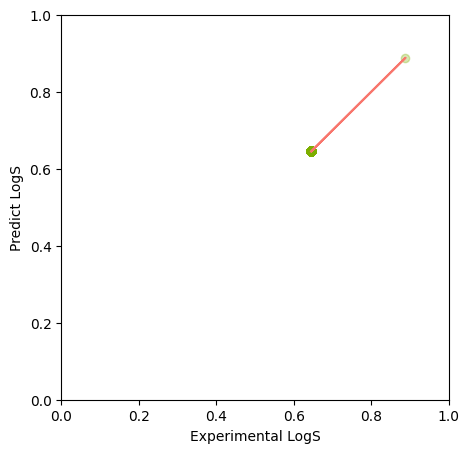

In [36]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, c="#7CAE00" ,alpha=0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.ylabel('Predict LogS')
plt.xlabel('Experimental LogS')


In [37]:
g_sequence2 = g_sequence.drop(columns=['sequence'])

In [38]:
y_pred_0110 = lr.predict(g_sequence2)
y_pred_0110[0]

0.645004924623116

In [39]:
actual_value = g_sequence2['reactivity_0110']
accuracy = round((y_pred_0110[0] / actual_value) * 100, 4)
accuracy

50000    100.0
Name: reactivity_0110, dtype: float64

In [40]:
display(g_sequence2)


,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,reactivity_0009,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
50000,0.54,0.362,0.318,0.63,0.779,0.155,0.616,0.306,0.0,0.0,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,94


In [41]:
f1 = f_cluster.drop(columns=['sequence'])
display(f1)

,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,reactivity_0009,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
4143,18.863,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,0.270711,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,94
4152,34.103,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,0.270711,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,94
4179,15.882,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,0.270711,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,94
4274,13.634,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,0.270711,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,94
4887,20.679,0.630873,0.749603,0.711082,0.581269,0.498209,0.393119,0.322614,0.284252,0.270711,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74838,0.505,0.349000,0.044000,0.638000,0.838000,-0.019000,-0.227000,0.069000,1.091000,0.674000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,94
74839,0.378,0.329000,0.529000,0.503000,0.243000,0.013000,0.241000,0.240000,0.011000,0.011000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,94
74840,0.851,-0.055000,-0.231000,0.547000,0.438000,0.601000,0.331000,0.427000,0.229000,0.485000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,94
74991,0.251,0.220000,1.526000,0.000000,0.000000,0.123000,0.352000,0.695000,0.686000,0.341000,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,94


In [42]:
v= g_sequence2["signal_to_noise"]
v

50000    0.54
Name: signal_to_noise, dtype: float64

In [43]:
f =g_sequence2

In [44]:
for i  in f1:
  f[i]=f1[i].mean()
f["signal_to_noise"]=v

In [45]:
f

,signal_to_noise,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,reactivity_0009,...,reactivity_0140,reactivity_0141,reactivity_0142,reactivity_0143,reactivity_0144,reactivity_0145,reactivity_0146,reactivity_0147,reactivity_0148,cluster
50000,0.54,0.481898,0.601673,0.662512,0.583134,0.467446,0.350107,0.313485,0.498204,0.407097,...,0.251966,0.297403,0.297841,0.26846,0.498886,0.27578,0.780802,1.077849,0.772738,94.0


In [46]:
y_pred_0110 = lr.predict(g_sequence2)
y_pred_0110[0]

0.6455086428370603

In [47]:
actual_value = g_sequence2['reactivity_0110']
accuracy = round((y_pred_0110[0] / actual_value) * 100, 4)

In [48]:
accuracy

50000    99.9585
Name: reactivity_0110, dtype: float64